In [1]:
import tensorflow as tf

tf.__version__

'2.7.0'

In [7]:
import tensorflow.keras.datasets.mnist as mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [93]:
from matplotlib import pyplot as plt

In [9]:
x_train, y_train

(array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],

# What is the shape of the data?

We observe:
- The training data has 60,000 example data instances
- Each training example is 28 by 28... which is a 28 by 28 image
- There are 60,000 corresponding labels

In [12]:
x_train.shape, x_train.ndim, y_train.shape, y_train.ndim

((60000, 28, 28), 3, (60000,), 1)

# What does a single example data instance look like? And the corresponding label?

We observe:
- A single training example is made up of a 28x28 matrix
    - In the top level array, there are 28 arrays within it
    - Within each of the 28 arrays, there are integers 0 through 255
        - Likely we should normalize these values (convert them to values between 0 and 1 while preserving distribution)
- A single training label is a single integer between 0 and 9
    - These correspond to written numbers between 0 and 9

In [15]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [19]:
max(y_train), min(y_train)

(9, 0)

In [21]:
(x_train_RAW, y_train_RAW), (x_test_RAW, y_test_RAW) = mnist.load_data()

# Normalizing the data

- We'll convert the input values to be between 0 and 1
    - We'll accomplish this by dividing each value by the max possible value in the dataset

In [31]:
x_train_RAW_max_value = tf.math.reduce_max(x_train_RAW)

x_train_accepted = x_train_RAW / x_train_RAW_max_value
y_train_accepted = y_train_RAW

x_test_accepted = x_test_RAW / x_train_RAW_max_value
y_test_accepted = y_test_RAW

# x_train_RAW_max_value, x_train_accepted[0]

# Creating a validation dataset

- Validation datasets are used for checking the accuracy of the data while training
    - This can help with avoiding making the model too specific to the training data (overfitting), instead of generalized

In [35]:
y_train_accepted.shape, y_test_accepted.shape, 10000/60000

((60000,), (10000,), 0.16666666666666666)

In [40]:
x_validation_dataset = x_test_accepted[:5000]
y_validation_dataset = y_test_accepted[:5000]

x_testing_dataset = x_test_accepted[5000:]
y_testing_dataset = y_test_accepted[5000:]

x_training_dataset = x_train_accepted
y_training_dataset = y_train_accepted

x_validation_dataset.shape, y_validation_dataset.shape, x_testing_dataset.shape, y_testing_dataset.shape

(TensorShape([5000, 28, 28]), (5000,), TensorShape([5000, 28, 28]), (5000,))

# Create the model architecture and train

In [140]:
tf.random.set_seed(777) # Setting seed to help with reproducability during development

LEARNING_RATE=0.001

MULTICLASS_CLASSIFICATION_PROBLEM_ACTIVATION_FUNCTION = tf.keras.activations.relu
MULTICLASS_CLASSIFICATION_PROBLEM_ACTIVATION_FUNCTION_FOR_OUTPUT = tf.keras.activations.softmax
MULTICLASS_CLASSIFICATION_PROBLEM_LOSS_FUNCTION = tf.keras.losses.SparseCategoricalCrossentropy() # We use "sparse" because we did not one-hot encode the outputs (probably should have)
MULTICLASS_CLASSIFICATION_PROBLEM_OPTIMIZATION_FUNCTION = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE)

NUMBER_OF_OUTPUT_LABELS = 10

NUMBER_OF_TIMES_TO_EXPOSE_MODEL_TO_ALL_TEST_DATA = 25

# Here we establish a neural network, with a sequence of chained layers
model_001 = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation=MULTICLASS_CLASSIFICATION_PROBLEM_ACTIVATION_FUNCTION),
    tf.keras.layers.Dense(100, activation=MULTICLASS_CLASSIFICATION_PROBLEM_ACTIVATION_FUNCTION),
    tf.keras.layers.Dense(100, activation=MULTICLASS_CLASSIFICATION_PROBLEM_ACTIVATION_FUNCTION),
    tf.keras.layers.Dense(NUMBER_OF_OUTPUT_LABELS, activation=MULTICLASS_CLASSIFICATION_PROBLEM_ACTIVATION_FUNCTION_FOR_OUTPUT)
])

model_001.compile(
    loss=MULTICLASS_CLASSIFICATION_PROBLEM_LOSS_FUNCTION,
    optimizer=MULTICLASS_CLASSIFICATION_PROBLEM_OPTIMIZATION_FUNCTION,
    metrics=[ "accuracy" ]
)

model_001_history = model_001.fit(
    x_training_dataset,
    y_training_dataset,
    validation_data=(x_validation_dataset, y_validation_dataset),
    epochs=NUMBER_OF_TIMES_TO_EXPOSE_MODEL_TO_ALL_TEST_DATA
)

Epoch 1/25
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2459 - accuracy: 0.9254 - val_loss: 0.1905 - val_accuracy: 0.9406
Epoch 2/25
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1092 - accuracy: 0.9663 - val_loss: 0.1119 - val_accuracy: 0.9644
Epoch 3/25
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0766 - accuracy: 0.9764 - val_loss: 0.1354 - val_accuracy: 0.9568
Epoch 4/25
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0619 - accuracy: 0.9803 - val_loss: 0.1318 - val_accuracy: 0.9610
Epoch 5/25
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0489 - accuracy: 0.9849 - val_loss: 0.1416 - val_accuracy: 0.9626
Epoch 6/25
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0418 - accuracy: 0.9865 - val_loss: 0.1161 - val_accuracy: 0.9674
Epoch 7/25
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0360 - accuracy: 0.9882 - val_loss: 0.1278 - val_accuracy:

In [141]:
model_001.evaluate(x_testing_dataset, y_testing_dataset)

157/157 [==============================] - 0s 853us/step - loss: 0.0794 - accuracy: 0.9872


[0.07943195849657059, 0.9872000217437744]

expected prediction: 3
actual prediction: 3
is_correct: True


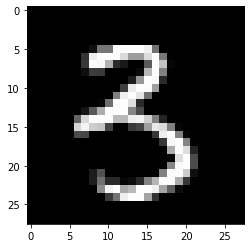

expected prediction: 9
actual prediction: 9
is_correct: True


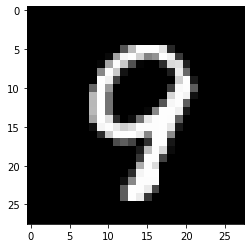

expected prediction: 9
actual prediction: 9
is_correct: True


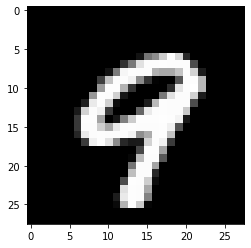

expected prediction: 8
actual prediction: 8
is_correct: True


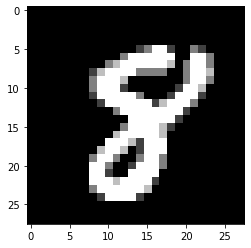

expected prediction: 4
actual prediction: 4
is_correct: True


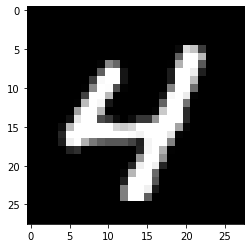

expected prediction: 1
actual prediction: 1
is_correct: True


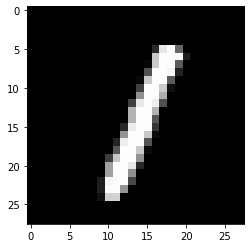

expected prediction: 0
actual prediction: 0
is_correct: True


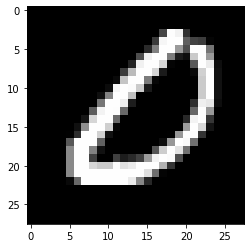

expected prediction: 6
actual prediction: 6
is_correct: True


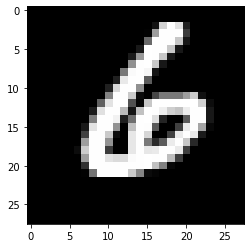

expected prediction: 0
actual prediction: 0
is_correct: True


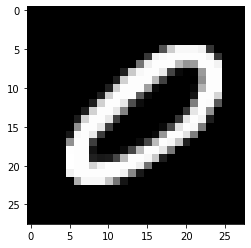

expected prediction: 9
actual prediction: 9
is_correct: True


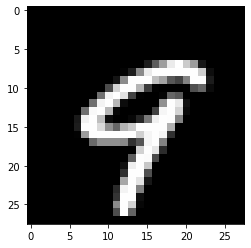

expected prediction: 6
actual prediction: 6
is_correct: True


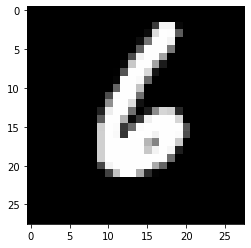

expected prediction: 8
actual prediction: 8
is_correct: True


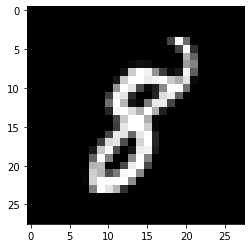

expected prediction: 6
actual prediction: 6
is_correct: True


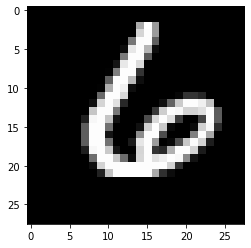

expected prediction: 1
actual prediction: 1
is_correct: True


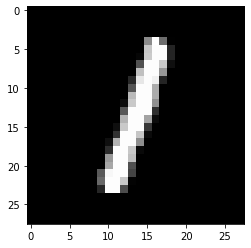

expected prediction: 1
actual prediction: 1
is_correct: True


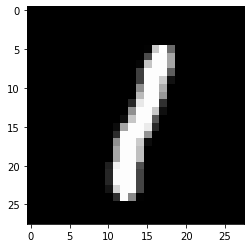

expected prediction: 9
actual prediction: 9
is_correct: True


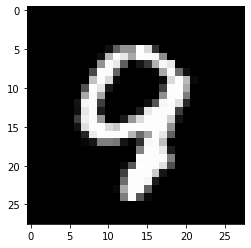

expected prediction: 8
actual prediction: 8
is_correct: True


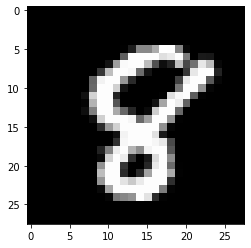

expected prediction: 9
actual prediction: 9
is_correct: True


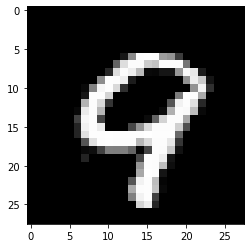

expected prediction: 2
actual prediction: 2
is_correct: True


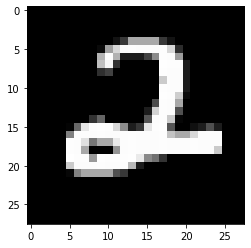

expected prediction: 3
actual prediction: 3
is_correct: True


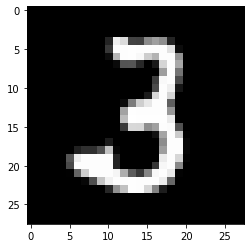

expected prediction: 5
actual prediction: 5
is_correct: True


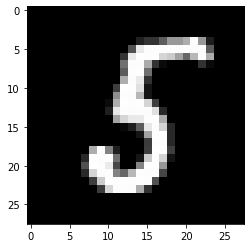

expected prediction: 5
actual prediction: 5
is_correct: True


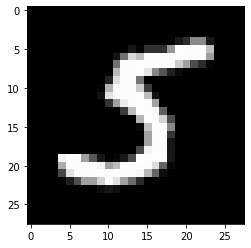

expected prediction: 9
actual prediction: 9
is_correct: True


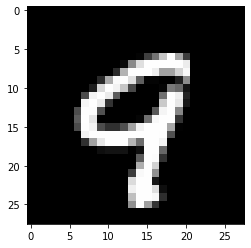

expected prediction: 4
actual prediction: 4
is_correct: True


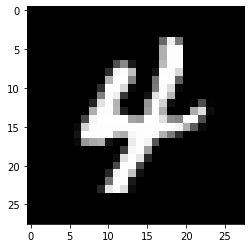

expected prediction: 2
actual prediction: 2
is_correct: True


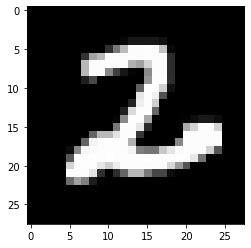

expected prediction: 1
actual prediction: 1
is_correct: True


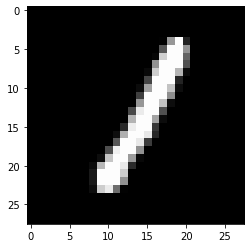

expected prediction: 9
actual prediction: 9
is_correct: True


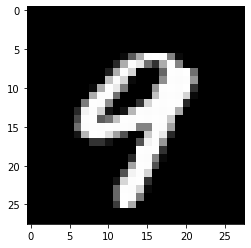

expected prediction: 4
actual prediction: 4
is_correct: True


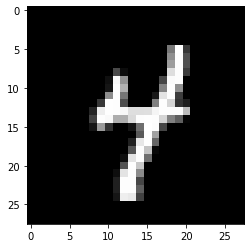

expected prediction: 3
actual prediction: 3
is_correct: True


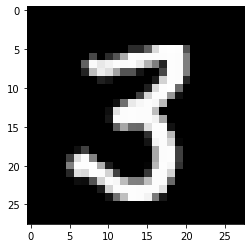

expected prediction: 9
actual prediction: 9
is_correct: True


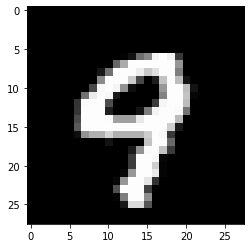

expected prediction: 6
actual prediction: 6
is_correct: True


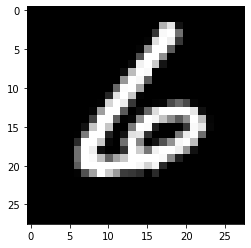

expected prediction: 0
actual prediction: 0
is_correct: True


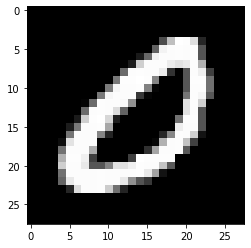

expected prediction: 4
actual prediction: 4
is_correct: True


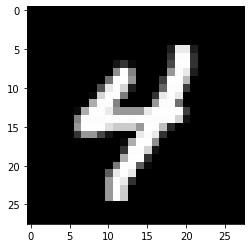

expected prediction: 0
actual prediction: 0
is_correct: True


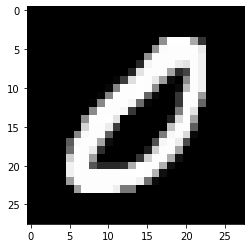

expected prediction: 6
actual prediction: 6
is_correct: True


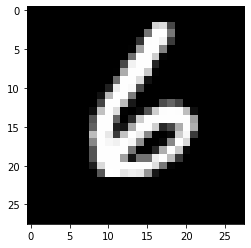

expected prediction: 0
actual prediction: 0
is_correct: True


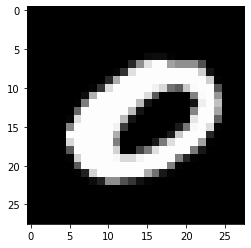

expected prediction: 1
actual prediction: 1
is_correct: True


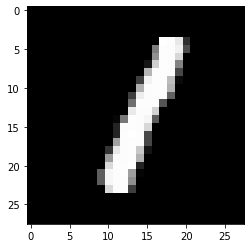

expected prediction: 2
actual prediction: 2
is_correct: True


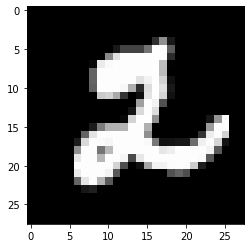

expected prediction: 3
actual prediction: 3
is_correct: True


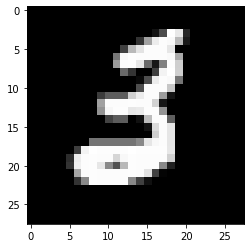

expected prediction: 4
actual prediction: 4
is_correct: True


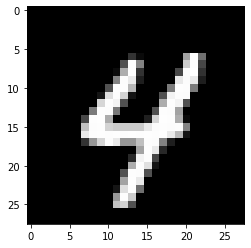

expected prediction: 7
actual prediction: 7
is_correct: True


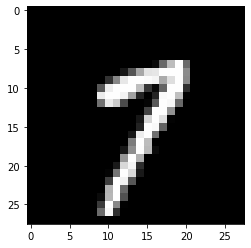

expected prediction: 8
actual prediction: 8
is_correct: True


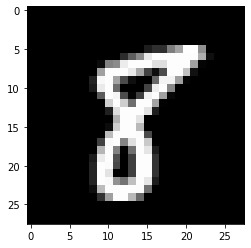

expected prediction: 9
actual prediction: 9
is_correct: True


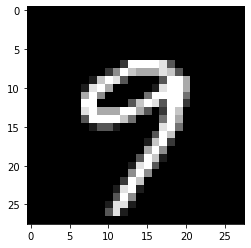

expected prediction: 0
actual prediction: 0
is_correct: True


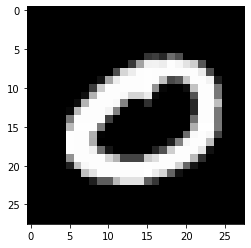

expected prediction: 1
actual prediction: 1
is_correct: True


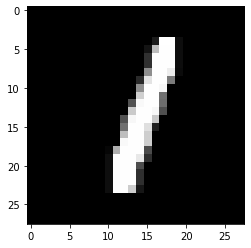

expected prediction: 2
actual prediction: 2
is_correct: True


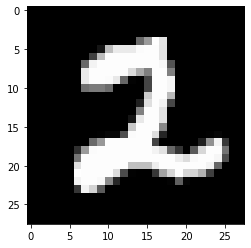

expected prediction: 3
actual prediction: 3
is_correct: True


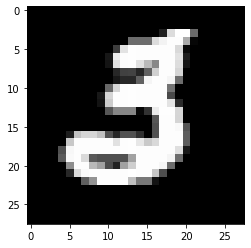

expected prediction: 4
actual prediction: 4
is_correct: True


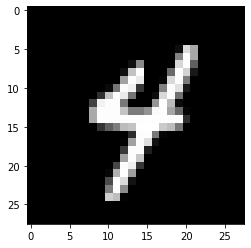

expected prediction: 7
actual prediction: 7
is_correct: True


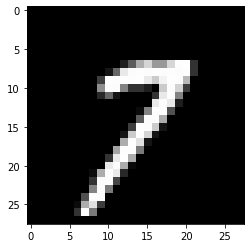

expected prediction: 8
actual prediction: 8
is_correct: True


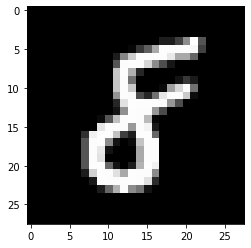

expected prediction: 9
actual prediction: 9
is_correct: True


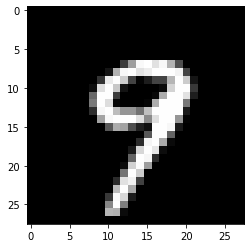

expected prediction: 0
actual prediction: 0
is_correct: True


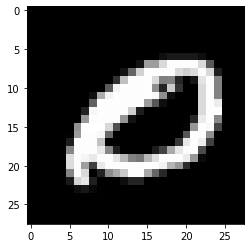

expected prediction: 1
actual prediction: 1
is_correct: True


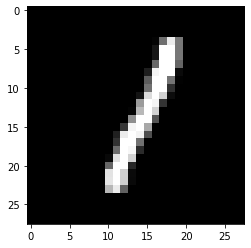

expected prediction: 2
actual prediction: 2
is_correct: True


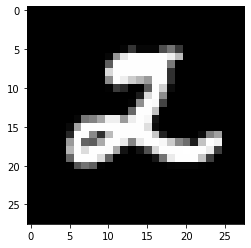

expected prediction: 3
actual prediction: 3
is_correct: True


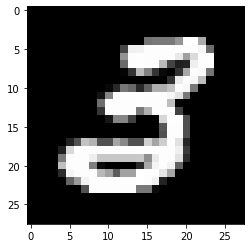

expected prediction: 4
actual prediction: 4
is_correct: True


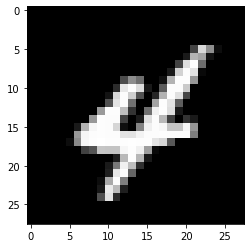

expected prediction: 5
actual prediction: 5
is_correct: True


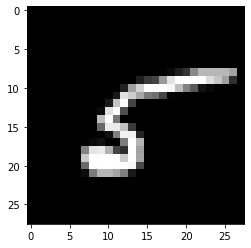

expected prediction: 6
actual prediction: 6
is_correct: True


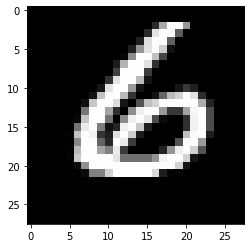

expected prediction: 7
actual prediction: 7
is_correct: True


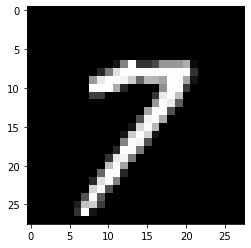

expected prediction: 8
actual prediction: 8
is_correct: True


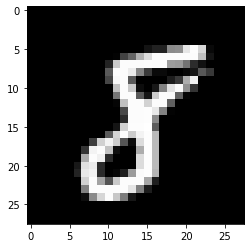

expected prediction: 9
actual prediction: 9
is_correct: True


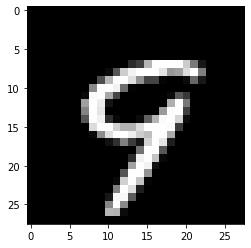

expected prediction: 8
actual prediction: 8
is_correct: True


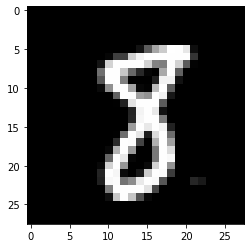

expected prediction: 3
actual prediction: 3
is_correct: True


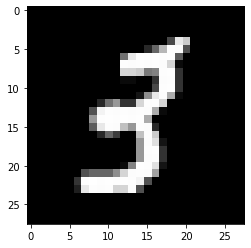

expected prediction: 4
actual prediction: 4
is_correct: True


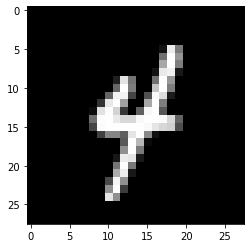

expected prediction: 7
actual prediction: 7
is_correct: True


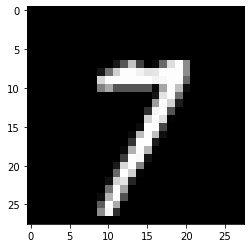

expected prediction: 8
actual prediction: 8
is_correct: True


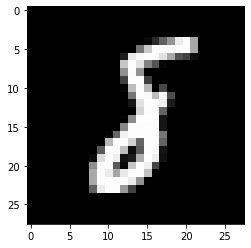

expected prediction: 6
actual prediction: 6
is_correct: True


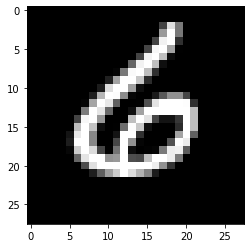

expected prediction: 3
actual prediction: 3
is_correct: True


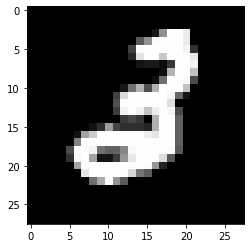

expected prediction: 4
actual prediction: 4
is_correct: True


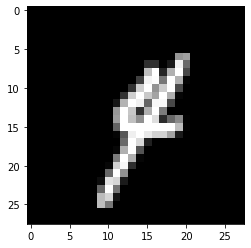

expected prediction: 0
actual prediction: 0
is_correct: True


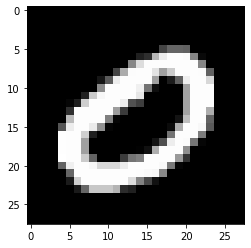

expected prediction: 9
actual prediction: 9
is_correct: True


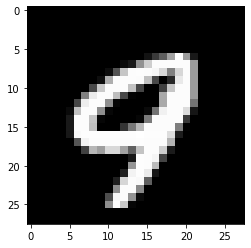

expected prediction: 7
actual prediction: 7
is_correct: True


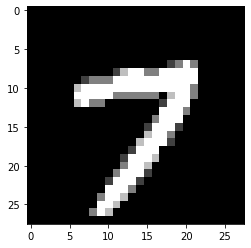

expected prediction: 1
actual prediction: 1
is_correct: True


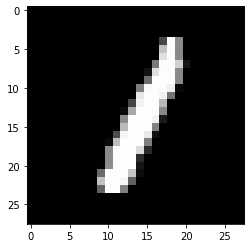

expected prediction: 9
actual prediction: 9
is_correct: True


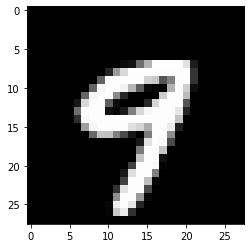

expected prediction: 3
actual prediction: 3
is_correct: True


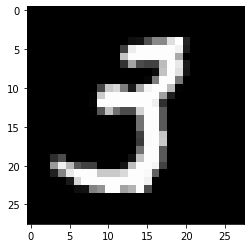

expected prediction: 8
actual prediction: 8
is_correct: True


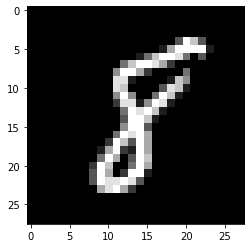

expected prediction: 4
actual prediction: 4
is_correct: True


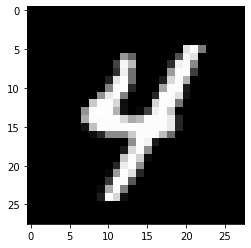

expected prediction: 7
actual prediction: 7
is_correct: True


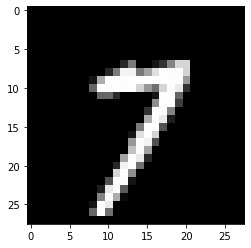

expected prediction: 3
actual prediction: 3
is_correct: True


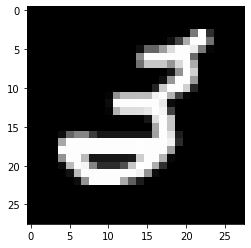

expected prediction: 0
actual prediction: 0
is_correct: True


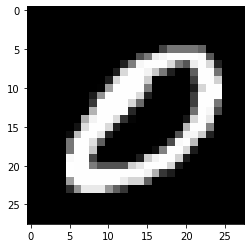

expected prediction: 9
actual prediction: 9
is_correct: True


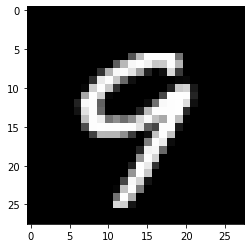

expected prediction: 1
actual prediction: 1
is_correct: True


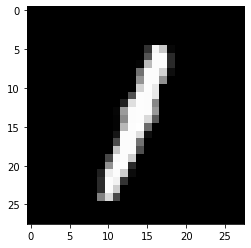

expected prediction: 4
actual prediction: 4
is_correct: True


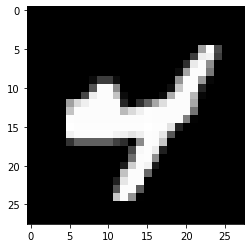

expected prediction: 5
actual prediction: 5
is_correct: True


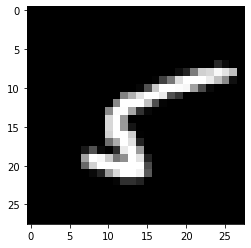

expected prediction: 4
actual prediction: 4
is_correct: True


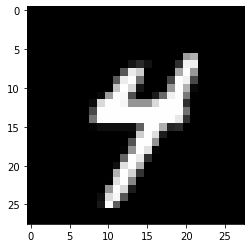

expected prediction: 6
actual prediction: 6
is_correct: True


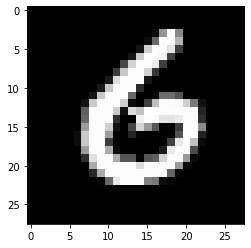

expected prediction: 2
actual prediction: 2
is_correct: True


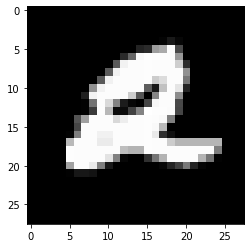

expected prediction: 0
actual prediction: 0
is_correct: True


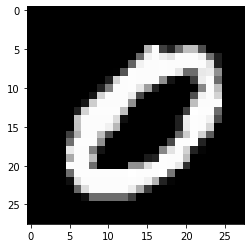

expected prediction: 6
actual prediction: 6
is_correct: True


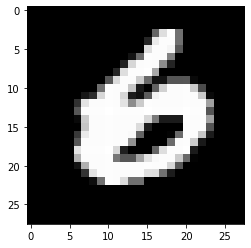

expected prediction: 2
actual prediction: 2
is_correct: True


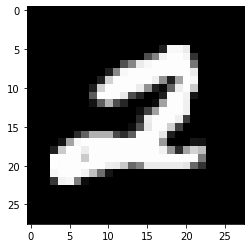

expected prediction: 1
actual prediction: 1
is_correct: True


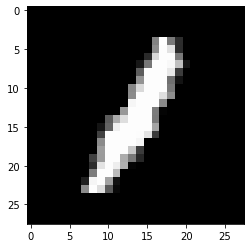

expected prediction: 1
actual prediction: 1
is_correct: True


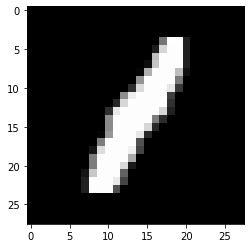

expected prediction: 1
actual prediction: 1
is_correct: True


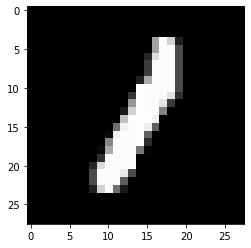

expected prediction: 1
actual prediction: 1
is_correct: True


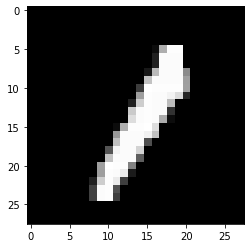

expected prediction: 7
actual prediction: 7
is_correct: True


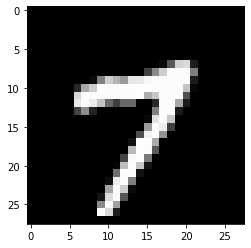

expected prediction: 2
actual prediction: 2
is_correct: True


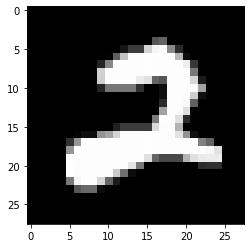

expected prediction: 4
actual prediction: 4
is_correct: True


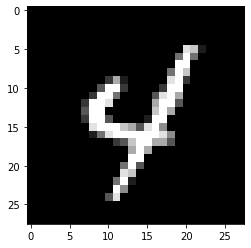

expected prediction: 7
actual prediction: 7
is_correct: True


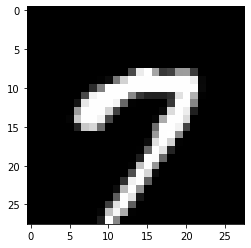

expected prediction: 5
actual prediction: 5
is_correct: True


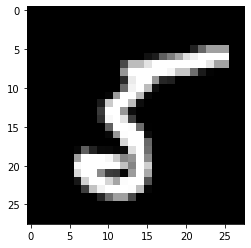

expected prediction: 2
actual prediction: 2
is_correct: True


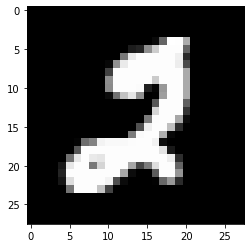

In [123]:
for test_index in range(0, 100):

    test_tensor = tf.expand_dims(x_testing_dataset[test_index], axis=0)

    test_predictions = model_001.predict(test_tensor)

    test_max_prediction_index = tf.argmax(test_predictions, axis=1)
    
    expected_value = y_testing_dataset[test_index]
    actual_value = test_max_prediction_index[0].numpy()
    is_correct = expected_value == actual_value
    
    if is_correct == True:
        print('expected prediction:', expected_value)
        print('actual prediction:', actual_value)

        print('is_correct:', expected_value == actual_value)

        plt.imshow(x_testing_dataset[test_index], cmap='gray')
        plt.show()

# Trying to get above 99% accuracy

## Adjusting the learning rate to 0.0001

- Result was it was about the same

In [143]:
tf.random.set_seed(777) # Setting seed to help with reproducability during development

LEARNING_RATE=0.0001

MULTICLASS_CLASSIFICATION_PROBLEM_ACTIVATION_FUNCTION = tf.keras.activations.relu
MULTICLASS_CLASSIFICATION_PROBLEM_ACTIVATION_FUNCTION_FOR_OUTPUT = tf.keras.activations.softmax
MULTICLASS_CLASSIFICATION_PROBLEM_LOSS_FUNCTION = tf.keras.losses.SparseCategoricalCrossentropy() # We use "sparse" because we did not one-hot encode the outputs (probably should have)
MULTICLASS_CLASSIFICATION_PROBLEM_OPTIMIZATION_FUNCTION = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE)

NUMBER_OF_OUTPUT_LABELS = 10

NUMBER_OF_TIMES_TO_EXPOSE_MODEL_TO_ALL_TEST_DATA = 25

# Here we establish a neural network, with a sequence of chained layers
model_002 = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation=MULTICLASS_CLASSIFICATION_PROBLEM_ACTIVATION_FUNCTION),
    tf.keras.layers.Dense(100, activation=MULTICLASS_CLASSIFICATION_PROBLEM_ACTIVATION_FUNCTION),
    tf.keras.layers.Dense(100, activation=MULTICLASS_CLASSIFICATION_PROBLEM_ACTIVATION_FUNCTION),
    tf.keras.layers.Dense(NUMBER_OF_OUTPUT_LABELS, activation=MULTICLASS_CLASSIFICATION_PROBLEM_ACTIVATION_FUNCTION_FOR_OUTPUT)
])

model_002.compile(
    loss=MULTICLASS_CLASSIFICATION_PROBLEM_LOSS_FUNCTION,
    optimizer=MULTICLASS_CLASSIFICATION_PROBLEM_OPTIMIZATION_FUNCTION,
    metrics=[ "accuracy" ]
)

model_002_history = model_002.fit(
    x_training_dataset,
    y_training_dataset,
    validation_data=(x_validation_dataset, y_validation_dataset),
    epochs=NUMBER_OF_TIMES_TO_EXPOSE_MODEL_TO_ALL_TEST_DATA
)

Epoch 1/25
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5413 - accuracy: 0.8506 - val_loss: 0.3275 - val_accuracy: 0.9050
Epoch 2/25
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2256 - accuracy: 0.9355 - val_loss: 0.2509 - val_accuracy: 0.9238
Epoch 3/25
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1777 - accuracy: 0.9481 - val_loss: 0.2088 - val_accuracy: 0.9374
Epoch 4/25
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1483 - accuracy: 0.9569 - val_loss: 0.1865 - val_accuracy: 0.9442
Epoch 5/25
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1271 - accuracy: 0.9633 - val_loss: 0.1713 - val_accuracy: 0.9496
Epoch 6/25
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1104 - accuracy: 0.9677 - val_loss: 0.1529 - val_accuracy: 0.9538
Epoch 7/25
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0968 - accuracy: 0.9714 - val_loss: 0.1459 - val_accuracy:

In [144]:
model_002.evaluate(x_testing_dataset, y_testing_dataset)

157/157 [==============================] - 0s 870us/step - loss: 0.0516 - accuracy: 0.9856


[0.051569774746894836, 0.9855999946594238]

## Adjusting the learning rate to 0.01

- The result was worse


In [147]:
tf.random.set_seed(777) # Setting seed to help with reproducability during development

LEARNING_RATE=0.01

MULTICLASS_CLASSIFICATION_PROBLEM_ACTIVATION_FUNCTION = tf.keras.activations.relu
MULTICLASS_CLASSIFICATION_PROBLEM_ACTIVATION_FUNCTION_FOR_OUTPUT = tf.keras.activations.softmax
MULTICLASS_CLASSIFICATION_PROBLEM_LOSS_FUNCTION = tf.keras.losses.SparseCategoricalCrossentropy() # We use "sparse" because we did not one-hot encode the outputs (probably should have)
MULTICLASS_CLASSIFICATION_PROBLEM_OPTIMIZATION_FUNCTION = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE)

NUMBER_OF_OUTPUT_LABELS = 10

NUMBER_OF_TIMES_TO_EXPOSE_MODEL_TO_ALL_TEST_DATA = 25

# Here we establish a neural network, with a sequence of chained layers
model_003 = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation=MULTICLASS_CLASSIFICATION_PROBLEM_ACTIVATION_FUNCTION),
    tf.keras.layers.Dense(100, activation=MULTICLASS_CLASSIFICATION_PROBLEM_ACTIVATION_FUNCTION),
    tf.keras.layers.Dense(100, activation=MULTICLASS_CLASSIFICATION_PROBLEM_ACTIVATION_FUNCTION),
    tf.keras.layers.Dense(NUMBER_OF_OUTPUT_LABELS, activation=MULTICLASS_CLASSIFICATION_PROBLEM_ACTIVATION_FUNCTION_FOR_OUTPUT)
])

model_003.compile(
    loss=MULTICLASS_CLASSIFICATION_PROBLEM_LOSS_FUNCTION,
    optimizer=MULTICLASS_CLASSIFICATION_PROBLEM_OPTIMIZATION_FUNCTION,
    metrics=[ "accuracy" ]
)

model_003_history = model_003.fit(
    x_training_dataset,
    y_training_dataset,
    validation_data=(x_validation_dataset, y_validation_dataset),
    epochs=NUMBER_OF_TIMES_TO_EXPOSE_MODEL_TO_ALL_TEST_DATA
)

Epoch 1/25
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3066 - accuracy: 0.9146 - val_loss: 0.3206 - val_accuracy: 0.9066
Epoch 2/25
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2033 - accuracy: 0.9477 - val_loss: 0.2422 - val_accuracy: 0.9336
Epoch 3/25
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1775 - accuracy: 0.9556 - val_loss: 0.2248 - val_accuracy: 0.9448
Epoch 4/25
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1621 - accuracy: 0.9604 - val_loss: 0.2012 - val_accuracy: 0.9514
Epoch 5/25
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1547 - accuracy: 0.9620 - val_loss: 0.2294 - val_accuracy: 0.9482
Epoch 6/25
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1384 - accuracy: 0.9659 - val_loss: 0.2319 - val_accuracy: 0.9498
Epoch 7/25
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1404 - accuracy: 0.9677 - val_loss: 0.2484 - val_accuracy:

In [148]:
model_003.evaluate(x_testing_dataset, y_testing_dataset)

157/157 [==============================] - 0s 825us/step - loss: 0.1342 - accuracy: 0.9728


[0.13415050506591797, 0.9728000164031982]

## Trying training for 100 epochs

- Seems to be about the same

In [149]:
tf.random.set_seed(777) # Setting seed to help with reproducability during development

LEARNING_RATE=0.001

MULTICLASS_CLASSIFICATION_PROBLEM_ACTIVATION_FUNCTION = tf.keras.activations.relu
MULTICLASS_CLASSIFICATION_PROBLEM_ACTIVATION_FUNCTION_FOR_OUTPUT = tf.keras.activations.softmax
MULTICLASS_CLASSIFICATION_PROBLEM_LOSS_FUNCTION = tf.keras.losses.SparseCategoricalCrossentropy() # We use "sparse" because we did not one-hot encode the outputs (probably should have)
MULTICLASS_CLASSIFICATION_PROBLEM_OPTIMIZATION_FUNCTION = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE)

NUMBER_OF_OUTPUT_LABELS = 10

NUMBER_OF_TIMES_TO_EXPOSE_MODEL_TO_ALL_TEST_DATA = 100

# Here we establish a neural network, with a sequence of chained layers
model_004 = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation=MULTICLASS_CLASSIFICATION_PROBLEM_ACTIVATION_FUNCTION),
    tf.keras.layers.Dense(100, activation=MULTICLASS_CLASSIFICATION_PROBLEM_ACTIVATION_FUNCTION),
    tf.keras.layers.Dense(100, activation=MULTICLASS_CLASSIFICATION_PROBLEM_ACTIVATION_FUNCTION),
    tf.keras.layers.Dense(NUMBER_OF_OUTPUT_LABELS, activation=MULTICLASS_CLASSIFICATION_PROBLEM_ACTIVATION_FUNCTION_FOR_OUTPUT)
])

model_004.compile(
    loss=MULTICLASS_CLASSIFICATION_PROBLEM_LOSS_FUNCTION,
    optimizer=MULTICLASS_CLASSIFICATION_PROBLEM_OPTIMIZATION_FUNCTION,
    metrics=[ "accuracy" ]
)

model_004_history = model_004.fit(
    x_training_dataset,
    y_training_dataset,
    validation_data=(x_validation_dataset, y_validation_dataset),
    epochs=NUMBER_OF_TIMES_TO_EXPOSE_MODEL_TO_ALL_TEST_DATA
)

Epoch 1/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2459 - accuracy: 0.9254 - val_loss: 0.1905 - val_accuracy: 0.9406
Epoch 2/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1092 - accuracy: 0.9663 - val_loss: 0.1119 - val_accuracy: 0.9644
Epoch 3/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0766 - accuracy: 0.9764 - val_loss: 0.1354 - val_accuracy: 0.9568
Epoch 4/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0619 - accuracy: 0.9803 - val_loss: 0.1318 - val_accuracy: 0.9610
Epoch 5/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0489 - accuracy: 0.9849 - val_loss: 0.1416 - val_accuracy: 0.9626
Epoch 6/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0418 - accuracy: 0.9865 - val_loss: 0.1161 - val_accuracy: 0.9674
Epoch 7/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0360 - accuracy: 0.9882 - val_loss: 0.1278 - val_ac

1875/1875 [==============================] - 2s 1ms/step - loss: 0.0077 - accuracy: 0.9979 - val_loss: 0.2593 - val_accuracy: 0.9718
Epoch 58/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0069 - accuracy: 0.9982 - val_loss: 0.2532 - val_accuracy: 0.9696
Epoch 59/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0053 - accuracy: 0.9985 - val_loss: 0.2760 - val_accuracy: 0.9714
Epoch 60/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0079 - accuracy: 0.9981 - val_loss: 0.2437 - val_accuracy: 0.9718
Epoch 61/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0063 - accuracy: 0.9984 - val_loss: 0.2538 - val_accuracy: 0.9720
Epoch 62/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0078 - accuracy: 0.9981 - val_loss: 0.2712 - val_accuracy: 0.9738
Epoch 63/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0078 - accuracy: 0.9983 - val_loss: 0.3071 - val_accuracy

In [150]:
model_004.evaluate(x_testing_dataset, y_testing_dataset)

157/157 [==============================] - 0s 825us/step - loss: 0.1925 - accuracy: 0.9886


[0.19253556430339813, 0.9886000156402588]

# Trying 0.0001 learning rate and 100 epochs

- Got 98.5% accuracy. So, about the same. Maybe a little worse.

In [151]:
tf.random.set_seed(777) # Setting seed to help with reproducability during development

LEARNING_RATE=0.0001

MULTICLASS_CLASSIFICATION_PROBLEM_ACTIVATION_FUNCTION = tf.keras.activations.relu
MULTICLASS_CLASSIFICATION_PROBLEM_ACTIVATION_FUNCTION_FOR_OUTPUT = tf.keras.activations.softmax
MULTICLASS_CLASSIFICATION_PROBLEM_LOSS_FUNCTION = tf.keras.losses.SparseCategoricalCrossentropy() # We use "sparse" because we did not one-hot encode the outputs (probably should have)
MULTICLASS_CLASSIFICATION_PROBLEM_OPTIMIZATION_FUNCTION = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE)

NUMBER_OF_OUTPUT_LABELS = 10

NUMBER_OF_TIMES_TO_EXPOSE_MODEL_TO_ALL_TEST_DATA = 100

# Here we establish a neural network, with a sequence of chained layers
model_005 = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation=MULTICLASS_CLASSIFICATION_PROBLEM_ACTIVATION_FUNCTION),
    tf.keras.layers.Dense(100, activation=MULTICLASS_CLASSIFICATION_PROBLEM_ACTIVATION_FUNCTION),
    tf.keras.layers.Dense(100, activation=MULTICLASS_CLASSIFICATION_PROBLEM_ACTIVATION_FUNCTION),
    tf.keras.layers.Dense(NUMBER_OF_OUTPUT_LABELS, activation=MULTICLASS_CLASSIFICATION_PROBLEM_ACTIVATION_FUNCTION_FOR_OUTPUT)
])

model_005.compile(
    loss=MULTICLASS_CLASSIFICATION_PROBLEM_LOSS_FUNCTION,
    optimizer=MULTICLASS_CLASSIFICATION_PROBLEM_OPTIMIZATION_FUNCTION,
    metrics=[ "accuracy" ]
)

model_005_history = model_005.fit(
    x_training_dataset,
    y_training_dataset,
    validation_data=(x_validation_dataset, y_validation_dataset),
    epochs=NUMBER_OF_TIMES_TO_EXPOSE_MODEL_TO_ALL_TEST_DATA
)

Epoch 1/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5413 - accuracy: 0.8506 - val_loss: 0.3275 - val_accuracy: 0.9050
Epoch 2/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2256 - accuracy: 0.9355 - val_loss: 0.2509 - val_accuracy: 0.9238
Epoch 3/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1777 - accuracy: 0.9481 - val_loss: 0.2088 - val_accuracy: 0.9374
Epoch 4/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1483 - accuracy: 0.9569 - val_loss: 0.1865 - val_accuracy: 0.9442
Epoch 5/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1271 - accuracy: 0.9633 - val_loss: 0.1713 - val_accuracy: 0.9496
Epoch 6/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1104 - accuracy: 0.9677 - val_loss: 0.1529 - val_accuracy: 0.9538
Epoch 7/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0968 - accuracy: 0.9714 - val_loss: 0.1459 - val_ac

1875/1875 [==============================] - 2s 1ms/step - loss: 0.0018 - accuracy: 0.9994 - val_loss: 0.1935 - val_accuracy: 0.9678
Epoch 58/100
1875/1875 [==============================] - 2s 1ms/step - loss: 3.6715e-04 - accuracy: 1.0000 - val_loss: 0.2022 - val_accuracy: 0.9674
Epoch 59/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0030 - accuracy: 0.9991 - val_loss: 0.2081 - val_accuracy: 0.9686
Epoch 60/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0015 - accuracy: 0.9996 - val_loss: 0.2001 - val_accuracy: 0.9676
Epoch 61/100
1875/1875 [==============================] - 2s 1ms/step - loss: 3.5345e-04 - accuracy: 1.0000 - val_loss: 0.2003 - val_accuracy: 0.9678
Epoch 62/100
1875/1875 [==============================] - 2s 1ms/step - loss: 1.9964e-04 - accuracy: 1.0000 - val_loss: 0.1974 - val_accuracy: 0.9696
Epoch 63/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0031 - accuracy: 0.9989 - val_loss: 0.2018 - 

In [152]:
model_005.evaluate(x_testing_dataset, y_testing_dataset)

157/157 [==============================] - 0s 935us/step - loss: 0.0971 - accuracy: 0.9852


[0.09705353528261185, 0.9851999878883362]

# Adding in an additional large layer

- 583696 nodes/neurons in the layer so that
    - 28 x 28 = 764
        - 764 x 764 = 583696
- Trying one pass through the data first
- As a result, the accuracy is ~92/94/96%
- It is also very slow to evaluate

In [154]:
tf.random.set_seed(777) # Setting seed to help with reproducability during development

LEARNING_RATE=0.001

MULTICLASS_CLASSIFICATION_PROBLEM_ACTIVATION_FUNCTION = tf.keras.activations.relu
MULTICLASS_CLASSIFICATION_PROBLEM_ACTIVATION_FUNCTION_FOR_OUTPUT = tf.keras.activations.softmax
MULTICLASS_CLASSIFICATION_PROBLEM_LOSS_FUNCTION = tf.keras.losses.SparseCategoricalCrossentropy() # We use "sparse" because we did not one-hot encode the outputs (probably should have)
MULTICLASS_CLASSIFICATION_PROBLEM_OPTIMIZATION_FUNCTION = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE)

NUMBER_OF_OUTPUT_LABELS = 10

NUMBER_OF_TIMES_TO_EXPOSE_MODEL_TO_ALL_TEST_DATA = 1

# Here we establish a neural network, with a sequence of chained layers
model_006 = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(583696, activation=MULTICLASS_CLASSIFICATION_PROBLEM_ACTIVATION_FUNCTION),
    tf.keras.layers.Dense(100, activation=MULTICLASS_CLASSIFICATION_PROBLEM_ACTIVATION_FUNCTION),
    tf.keras.layers.Dense(100, activation=MULTICLASS_CLASSIFICATION_PROBLEM_ACTIVATION_FUNCTION),
    tf.keras.layers.Dense(100, activation=MULTICLASS_CLASSIFICATION_PROBLEM_ACTIVATION_FUNCTION),
    tf.keras.layers.Dense(NUMBER_OF_OUTPUT_LABELS, activation=MULTICLASS_CLASSIFICATION_PROBLEM_ACTIVATION_FUNCTION_FOR_OUTPUT)
])

model_006.compile(
    loss=MULTICLASS_CLASSIFICATION_PROBLEM_LOSS_FUNCTION,
    optimizer=MULTICLASS_CLASSIFICATION_PROBLEM_OPTIMIZATION_FUNCTION,
    metrics=[ "accuracy" ]
)

model_006_history = model_006.fit(
    x_training_dataset,
    y_training_dataset,
    validation_data=(x_validation_dataset, y_validation_dataset),
    epochs=NUMBER_OF_TIMES_TO_EXPOSE_MODEL_TO_ALL_TEST_DATA
)

1875/1875 [==============================] - 4171s 2s/step - loss: 0.2528 - accuracy: 0.9291 - val_loss: 0.1865 - val_accuracy: 0.9476


In [155]:
model_006.evaluate(x_testing_dataset, y_testing_dataset)

157/157 [==============================] - 34s 192ms/step - loss: 0.0973 - accuracy: 0.9680


[0.09730330109596252, 0.9679999947547913]

# Training the same for 1 additional epoch

- Result accuracy: 96/96/98%
    - This is 2% better on the test data
        - Since we're at 98% is it worth doing one more batch to see if we get to 99%?

In [156]:
model_006_history = model_006.fit(
    x_training_dataset,
    y_training_dataset,
    validation_data=(x_validation_dataset, y_validation_dataset),
    epochs=NUMBER_OF_TIMES_TO_EXPOSE_MODEL_TO_ALL_TEST_DATA
)

1875/1875 [==============================] - 3875s 2s/step - loss: 0.1108 - accuracy: 0.9681 - val_loss: 0.1293 - val_accuracy: 0.9614


In [157]:
model_006.evaluate(x_testing_dataset, y_testing_dataset)

157/157 [==============================] - 32s 194ms/step - loss: 0.0733 - accuracy: 0.9810


[0.07327133417129517, 0.9810000061988831]

# Training the same for 1 additional epoch, again

- No change, really. Seems to have stabilized at 98%

In [159]:
model_006_history = model_006.fit(
    x_training_dataset,
    y_training_dataset,
    validation_data=(x_validation_dataset, y_validation_dataset),
    epochs=NUMBER_OF_TIMES_TO_EXPOSE_MODEL_TO_ALL_TEST_DATA
)

1875/1875 [==============================] - 3805s 2s/step - loss: 0.0791 - accuracy: 0.9771 - val_loss: 0.1421 - val_accuracy: 0.9648


In [162]:
model_006.evaluate(x_testing_dataset, y_testing_dataset)

157/157 [==============================] - 67s 375ms/step - loss: 0.0555 - accuracy: 0.9844


[0.055515095591545105, 0.9843999743461609]

# Trying a Convolutional Neural Network

- Results: 99.8/98.3/99.4% accuracy
    - Goal accomplished on the test data with 99.4% accuracy
    - However, I'm wondering if my validation set was somehow off since it was around 98.3%. Doesn't seem representative. Maybe I didn't randomize the data before selecting the validation set? This is sort of a problem because I would have trained for less epochs if I had known that the accuracy for the test set was likely to be above 99%
        - On review, it looks like I did NOT randomize the sample data before selecting a validation dataset. There may have been a pattern in the sequence that I selected.

In [176]:
tf.random.set_seed(777) # Setting seed to help with reproducability during development

LEARNING_RATE=0.001

MULTICLASS_CLASSIFICATION_PROBLEM_ACTIVATION_FUNCTION = tf.keras.activations.relu
MULTICLASS_CLASSIFICATION_PROBLEM_ACTIVATION_FUNCTION_FOR_OUTPUT = tf.keras.activations.softmax
MULTICLASS_CLASSIFICATION_PROBLEM_LOSS_FUNCTION = tf.keras.losses.SparseCategoricalCrossentropy() # We use "sparse" because we did not one-hot encode the outputs (probably should have)
MULTICLASS_CLASSIFICATION_PROBLEM_OPTIMIZATION_FUNCTION = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE)

NUMBER_OF_OUTPUT_LABELS = 10

NUMBER_OF_TIMES_TO_EXPOSE_MODEL_TO_ALL_TEST_DATA = 25

print("x_training_dataset.shape", x_training_dataset.shape, x_training_dataset.shape[1:])

x_training_dataset_convolution = x_training_dataset.numpy().reshape(-1, 28, 28, 1)
x_validation_dataset_convolution = x_validation_dataset.numpy().reshape(-1, 28, 28, 1)
x_testing_dataset_convolution = x_testing_dataset.numpy().reshape(-1, 28, 28, 1)

print("x_training_dataset_convolution.shape", x_training_dataset_convolution.shape, x_training_dataset_convolution.shape[1:])

# Here we establish a neural network, with a sequence of chained layers
model_007 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(128, (3, 3), input_shape = x_training_dataset_convolution.shape[1:], activation=tf.keras.activations.relu),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    
    tf.keras.layers.Conv2D(128, (3, 3), activation=tf.keras.activations.relu),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10000, activation=MULTICLASS_CLASSIFICATION_PROBLEM_ACTIVATION_FUNCTION),
    tf.keras.layers.Dense(1000, activation=MULTICLASS_CLASSIFICATION_PROBLEM_ACTIVATION_FUNCTION),
    tf.keras.layers.Dense(100, activation=MULTICLASS_CLASSIFICATION_PROBLEM_ACTIVATION_FUNCTION),
    tf.keras.layers.Dense(NUMBER_OF_OUTPUT_LABELS, activation=MULTICLASS_CLASSIFICATION_PROBLEM_ACTIVATION_FUNCTION_FOR_OUTPUT)
])

model_007.summary()

model_007.compile(
    loss=MULTICLASS_CLASSIFICATION_PROBLEM_LOSS_FUNCTION,
    optimizer=MULTICLASS_CLASSIFICATION_PROBLEM_OPTIMIZATION_FUNCTION,
    metrics=[ "accuracy" ]
)

model_007_history = model_007.fit(
    x_training_dataset_convolution,
    y_training_dataset,
    validation_data=(x_validation_dataset_convolution, y_validation_dataset),
    epochs=NUMBER_OF_TIMES_TO_EXPOSE_MODEL_TO_ALL_TEST_DATA
)

x_training_dataset.shape (60000, 28, 28) (28, 28)
x_training_dataset_convolution.shape (60000, 28, 28, 1) (28, 28, 1)
Epoch 1/25
1875/1875 [==============================] - 475s 253ms/step - loss: 0.1211 - accuracy: 0.9638 - val_loss: 0.0864 - val_accuracy: 0.9730
Epoch 2/25
1875/1875 [==============================] - 471s 251ms/step - loss: 0.0500 - accuracy: 0.9866 - val_loss: 0.0556 - val_accuracy: 0.9854
Epoch 3/25
1875/1875 [==============================] - 457s 244ms/step - loss: 0.0399 - accuracy: 0.9896 - val_loss: 0.0579 - val_accuracy: 0.9848
Epoch 4/25
1875/1875 [==============================] - 457s 244ms/step - loss: 0.0282 - accuracy: 0.9926 - val_loss: 0.0548 - val_accuracy: 0.9846
Epoch 5/25
1875/1875 [==============================] - 473s 252ms/step - loss: 0.0246 - accuracy: 0.9936 - val_loss: 0.0625 - val_accuracy: 0.9866
Epoch 6/25
1875/1875 [==============================] - 445s 237ms/step - loss: 0.0230 - accuracy: 0.9946 - val_loss: 0.0543 - val_accuracy: 0

In [178]:
model_007.evaluate(x_testing_dataset, y_testing_dataset)

157/157 [==============================] - 4s 22ms/step - loss: 0.0446 - accuracy: 0.9940


[0.044649094343185425, 0.9940000176429749]

## Trying a less bute-force-y convolutional model

Source: https://www.youtube.com/watch?v=b2zmaz340_M
- 5 epochs
- 1 dense layer
- 3 convolutional layers


- Results 98.9/97.9/99.2 % (at 5 epochs)
    - Success! The test data is accurate more than 99% of the time
    
- Results 99.5/98.0/99.4 % (at 10 epochs)
    - Success! The test data is still above 99%
        - I still feel like the validation data should have been more representative of the test data. In future attempts, I will randomize the source data before validation test dataset selection

In [181]:
tf.random.set_seed(777) # Setting seed to help with reproducability during development

LEARNING_RATE=0.001

MULTICLASS_CLASSIFICATION_PROBLEM_ACTIVATION_FUNCTION = tf.keras.activations.relu
MULTICLASS_CLASSIFICATION_PROBLEM_ACTIVATION_FUNCTION_FOR_OUTPUT = tf.keras.activations.softmax
MULTICLASS_CLASSIFICATION_PROBLEM_LOSS_FUNCTION = tf.keras.losses.SparseCategoricalCrossentropy() # We use "sparse" because we did not one-hot encode the outputs (probably should have)
MULTICLASS_CLASSIFICATION_PROBLEM_OPTIMIZATION_FUNCTION = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE)

NUMBER_OF_OUTPUT_LABELS = 10

NUMBER_OF_TIMES_TO_EXPOSE_MODEL_TO_ALL_TEST_DATA = 10

print("x_training_dataset.shape", x_training_dataset.shape, x_training_dataset.shape[1:])

x_training_dataset_convolution = x_training_dataset.numpy().reshape(-1, 28, 28, 1)
x_validation_dataset_convolution = x_validation_dataset.numpy().reshape(-1, 28, 28, 1)
x_testing_dataset_convolution = x_testing_dataset.numpy().reshape(-1, 28, 28, 1)

print("x_training_dataset_convolution.shape", x_training_dataset_convolution.shape, x_training_dataset_convolution.shape[1:])

# Here we establish a neural network, with a sequence of chained layers
model_008 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), input_shape = x_training_dataset_convolution.shape[1:], activation=tf.keras.activations.relu),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    tf.keras.layers.Conv2D(64, (3, 3), activation=tf.keras.activations.relu),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    tf.keras.layers.Conv2D(64, (3, 3), activation=tf.keras.activations.relu),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(10000, activation=MULTICLASS_CLASSIFICATION_PROBLEM_ACTIVATION_FUNCTION),
#     tf.keras.layers.Dense(1000, activation=MULTICLASS_CLASSIFICATION_PROBLEM_ACTIVATION_FUNCTION),
    tf.keras.layers.Dense(64, activation=MULTICLASS_CLASSIFICATION_PROBLEM_ACTIVATION_FUNCTION),
    tf.keras.layers.Dense(NUMBER_OF_OUTPUT_LABELS, activation=MULTICLASS_CLASSIFICATION_PROBLEM_ACTIVATION_FUNCTION_FOR_OUTPUT)
])

model_008.summary()

model_008.compile(
    loss=MULTICLASS_CLASSIFICATION_PROBLEM_LOSS_FUNCTION,
    optimizer=MULTICLASS_CLASSIFICATION_PROBLEM_OPTIMIZATION_FUNCTION,
    metrics=[ "accuracy" ]
)

model_008_history = model_008.fit(
    x_training_dataset_convolution,
    y_training_dataset,
    validation_data=(x_validation_dataset_convolution, y_validation_dataset),
    epochs=NUMBER_OF_TIMES_TO_EXPOSE_MODEL_TO_ALL_TEST_DATA
)

x_training_dataset.shape (60000, 28, 28) (28, 28)
x_training_dataset_convolution.shape (60000, 28, 28, 1) (28, 28, 1)
Model: "sequential_42"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_24 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 3, 3, 64)          36928     
 

In [182]:
model_008.evaluate(x_testing_dataset, y_testing_dataset)

157/157 [==============================] - 1s 3ms/step - loss: 0.0318 - accuracy: 0.9940


[0.0317794531583786, 0.9940000176429749]

## Observing items that the model got correct
- The 99.4% appears to include nicely written numbers, with noticable variation. IE if the numbers are written well the model should recognize them.

expected prediction: 3
actual prediction: 3
is_correct: True


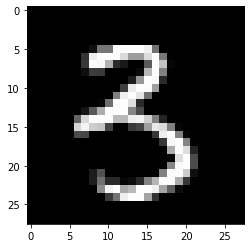

expected prediction: 9
actual prediction: 9
is_correct: True


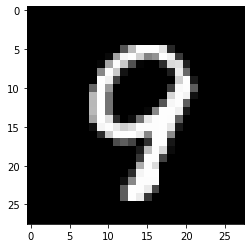

expected prediction: 9
actual prediction: 9
is_correct: True


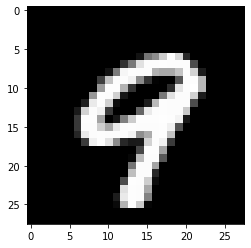

expected prediction: 8
actual prediction: 8
is_correct: True


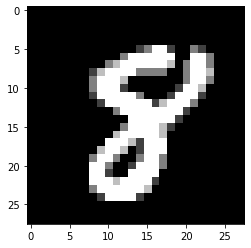

expected prediction: 4
actual prediction: 4
is_correct: True


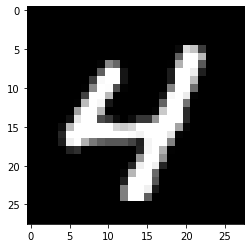

expected prediction: 1
actual prediction: 1
is_correct: True


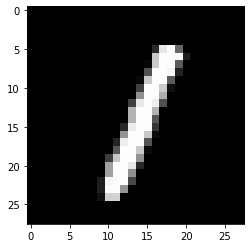

expected prediction: 0
actual prediction: 0
is_correct: True


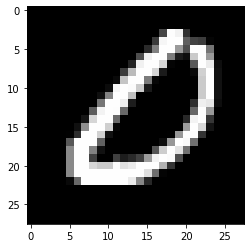

expected prediction: 6
actual prediction: 6
is_correct: True


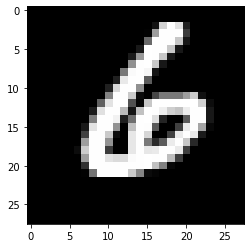

expected prediction: 0
actual prediction: 0
is_correct: True


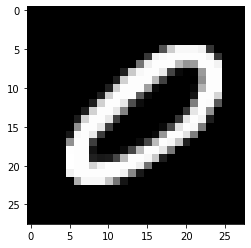

expected prediction: 9
actual prediction: 9
is_correct: True


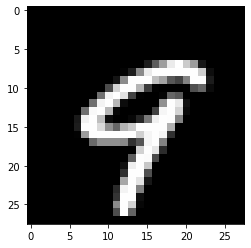

expected prediction: 6
actual prediction: 6
is_correct: True


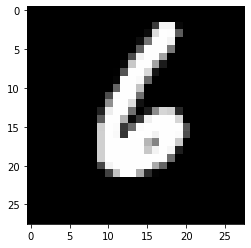

expected prediction: 8
actual prediction: 8
is_correct: True


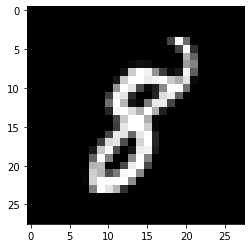

expected prediction: 6
actual prediction: 6
is_correct: True


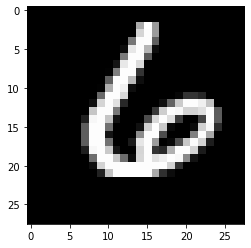

expected prediction: 1
actual prediction: 1
is_correct: True


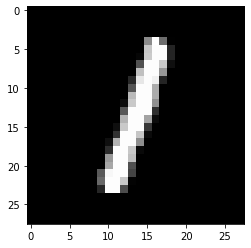

expected prediction: 1
actual prediction: 1
is_correct: True


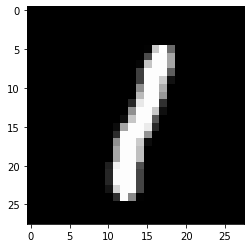

expected prediction: 9
actual prediction: 9
is_correct: True


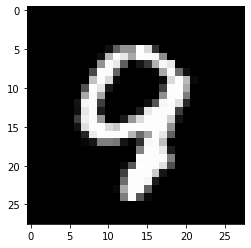

expected prediction: 8
actual prediction: 8
is_correct: True


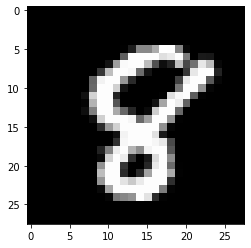

expected prediction: 9
actual prediction: 9
is_correct: True


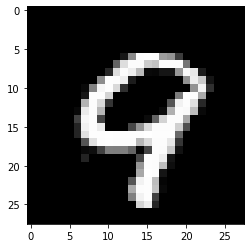

expected prediction: 2
actual prediction: 2
is_correct: True


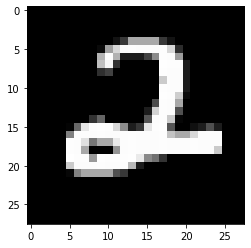

expected prediction: 3
actual prediction: 3
is_correct: True


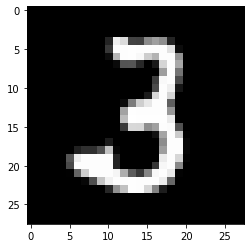

expected prediction: 5
actual prediction: 5
is_correct: True


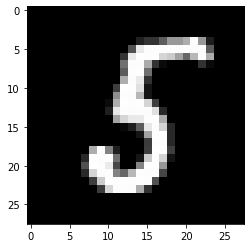

expected prediction: 5
actual prediction: 5
is_correct: True


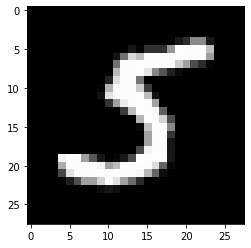

expected prediction: 9
actual prediction: 9
is_correct: True


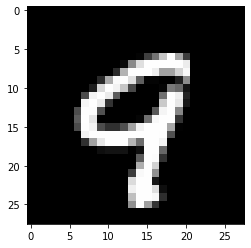

expected prediction: 4
actual prediction: 4
is_correct: True


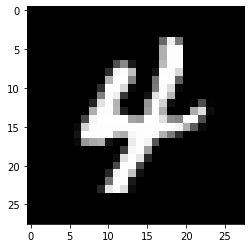

expected prediction: 2
actual prediction: 2
is_correct: True


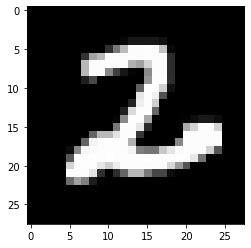

expected prediction: 1
actual prediction: 1
is_correct: True


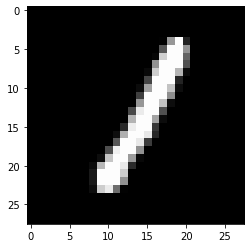

expected prediction: 9
actual prediction: 9
is_correct: True


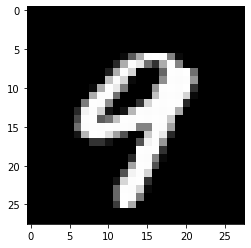

expected prediction: 4
actual prediction: 4
is_correct: True


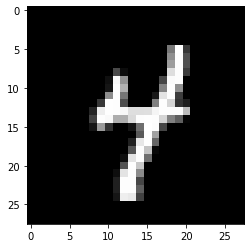

expected prediction: 3
actual prediction: 3
is_correct: True


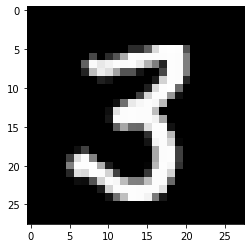

expected prediction: 9
actual prediction: 9
is_correct: True


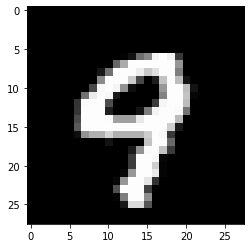

expected prediction: 6
actual prediction: 6
is_correct: True


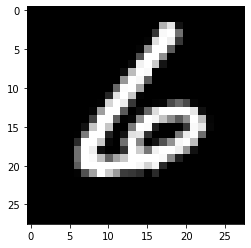

expected prediction: 0
actual prediction: 0
is_correct: True


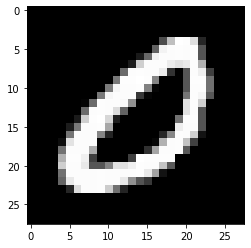

expected prediction: 4
actual prediction: 4
is_correct: True


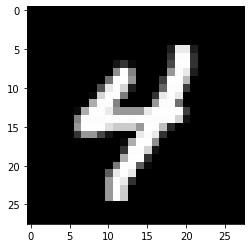

expected prediction: 0
actual prediction: 0
is_correct: True


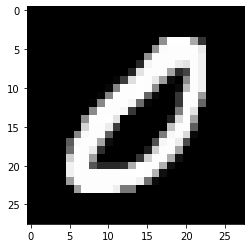

expected prediction: 6
actual prediction: 6
is_correct: True


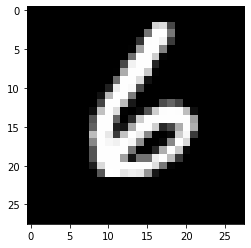

expected prediction: 0
actual prediction: 0
is_correct: True


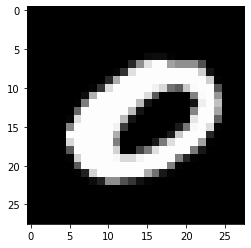

expected prediction: 1
actual prediction: 1
is_correct: True


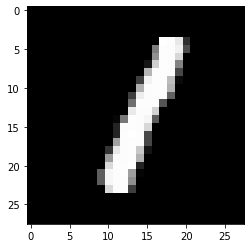

expected prediction: 2
actual prediction: 2
is_correct: True


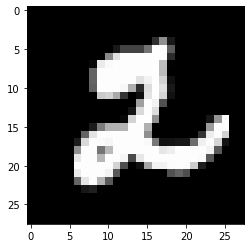

expected prediction: 3
actual prediction: 3
is_correct: True


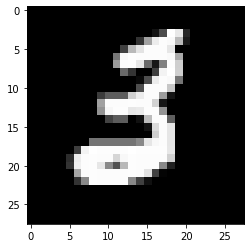

expected prediction: 4
actual prediction: 4
is_correct: True


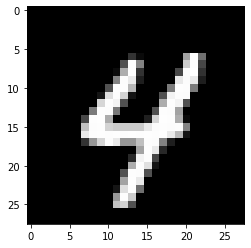

expected prediction: 7
actual prediction: 7
is_correct: True


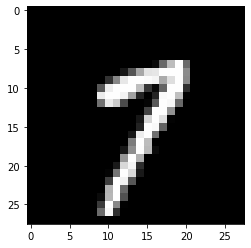

expected prediction: 8
actual prediction: 8
is_correct: True


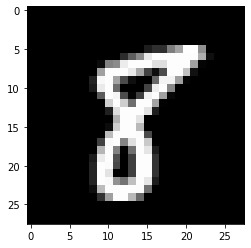

expected prediction: 9
actual prediction: 9
is_correct: True


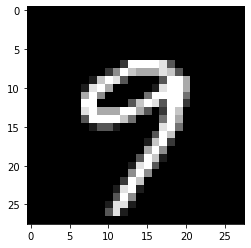

expected prediction: 0
actual prediction: 0
is_correct: True


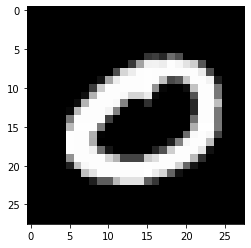

expected prediction: 1
actual prediction: 1
is_correct: True


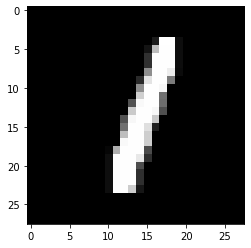

expected prediction: 2
actual prediction: 2
is_correct: True


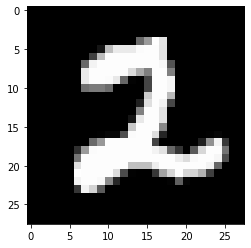

expected prediction: 3
actual prediction: 3
is_correct: True


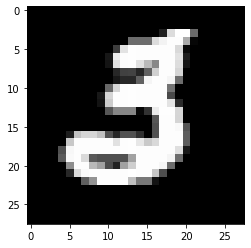

expected prediction: 4
actual prediction: 4
is_correct: True


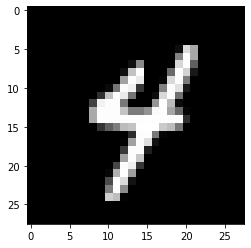

expected prediction: 7
actual prediction: 7
is_correct: True


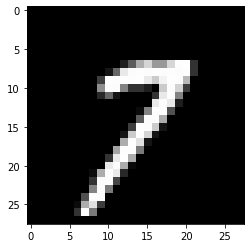

expected prediction: 8
actual prediction: 8
is_correct: True


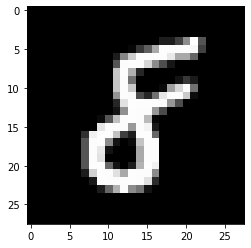

expected prediction: 9
actual prediction: 9
is_correct: True


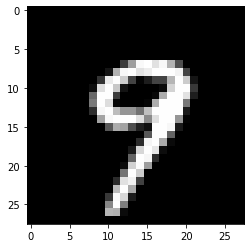

expected prediction: 0
actual prediction: 0
is_correct: True


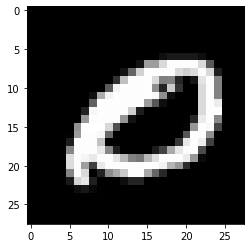

expected prediction: 1
actual prediction: 1
is_correct: True


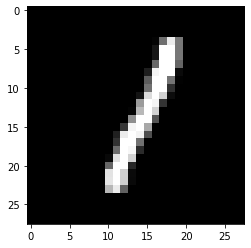

expected prediction: 2
actual prediction: 2
is_correct: True


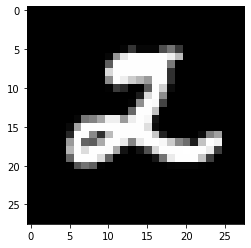

expected prediction: 3
actual prediction: 3
is_correct: True


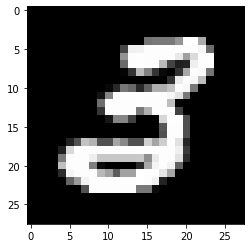

expected prediction: 4
actual prediction: 4
is_correct: True


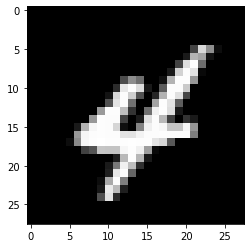

expected prediction: 5
actual prediction: 5
is_correct: True


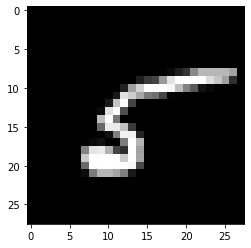

expected prediction: 6
actual prediction: 6
is_correct: True


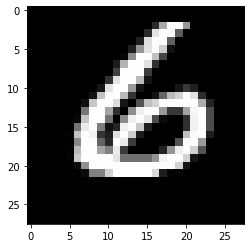

expected prediction: 7
actual prediction: 7
is_correct: True


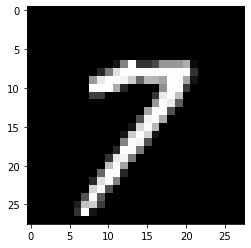

expected prediction: 8
actual prediction: 8
is_correct: True


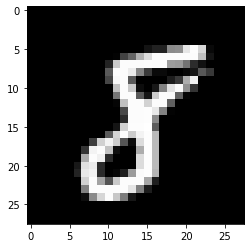

expected prediction: 9
actual prediction: 9
is_correct: True


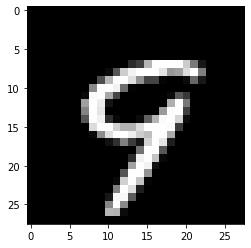

expected prediction: 8
actual prediction: 8
is_correct: True


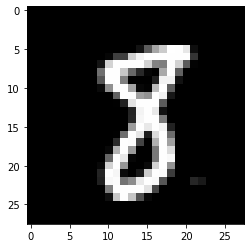

expected prediction: 3
actual prediction: 3
is_correct: True


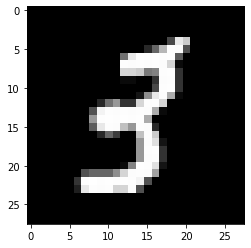

expected prediction: 4
actual prediction: 4
is_correct: True


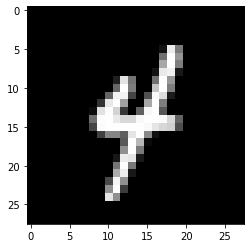

expected prediction: 7
actual prediction: 7
is_correct: True


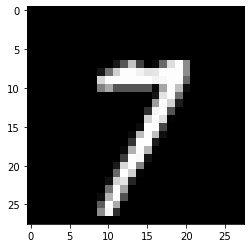

expected prediction: 8
actual prediction: 8
is_correct: True


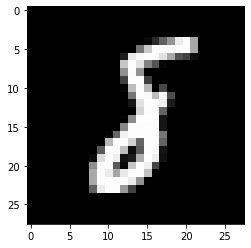

expected prediction: 6
actual prediction: 6
is_correct: True


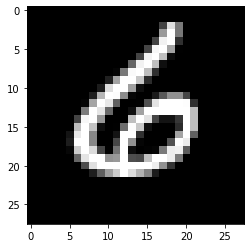

expected prediction: 3
actual prediction: 3
is_correct: True


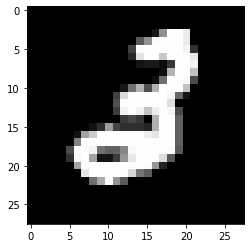

expected prediction: 4
actual prediction: 4
is_correct: True


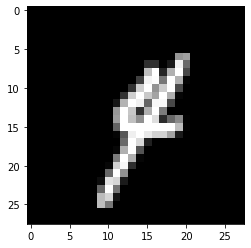

expected prediction: 0
actual prediction: 0
is_correct: True


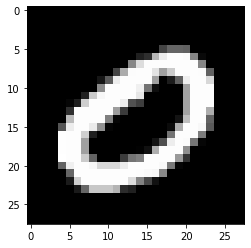

expected prediction: 9
actual prediction: 9
is_correct: True


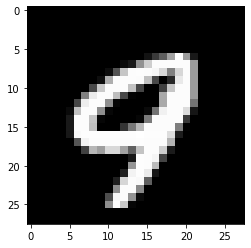

expected prediction: 7
actual prediction: 7
is_correct: True


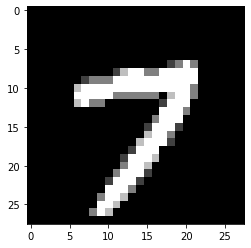

expected prediction: 1
actual prediction: 1
is_correct: True


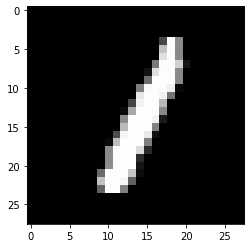

expected prediction: 9
actual prediction: 9
is_correct: True


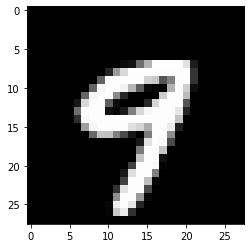

expected prediction: 3
actual prediction: 3
is_correct: True


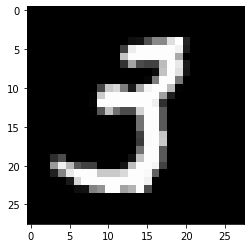

expected prediction: 8
actual prediction: 8
is_correct: True


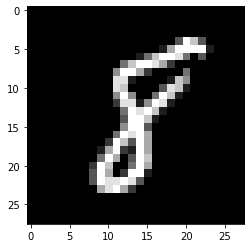

expected prediction: 4
actual prediction: 4
is_correct: True


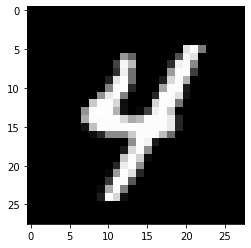

expected prediction: 7
actual prediction: 7
is_correct: True


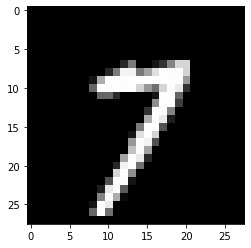

expected prediction: 3
actual prediction: 3
is_correct: True


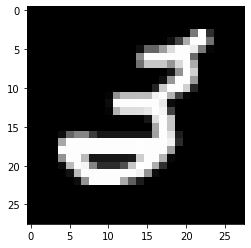

expected prediction: 0
actual prediction: 0
is_correct: True


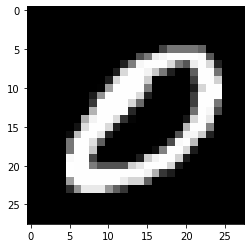

expected prediction: 9
actual prediction: 9
is_correct: True


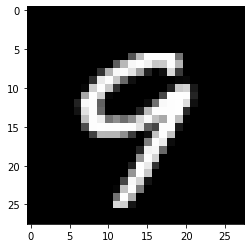

expected prediction: 1
actual prediction: 1
is_correct: True


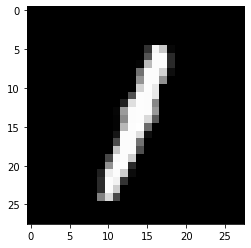

expected prediction: 4
actual prediction: 4
is_correct: True


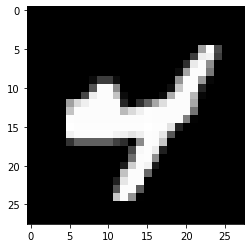

expected prediction: 5
actual prediction: 5
is_correct: True


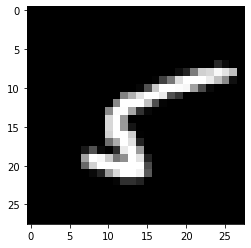

expected prediction: 4
actual prediction: 4
is_correct: True


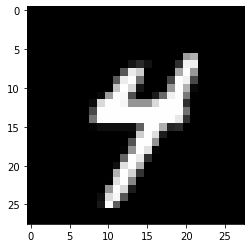

expected prediction: 6
actual prediction: 6
is_correct: True


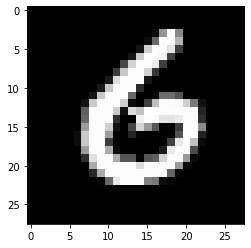

expected prediction: 2
actual prediction: 2
is_correct: True


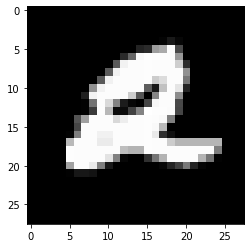

expected prediction: 0
actual prediction: 0
is_correct: True


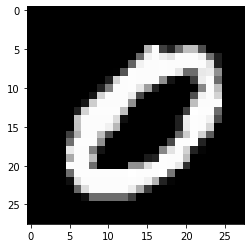

expected prediction: 6
actual prediction: 6
is_correct: True


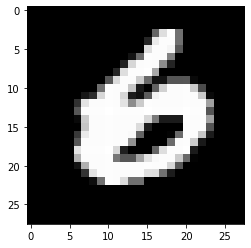

expected prediction: 2
actual prediction: 2
is_correct: True


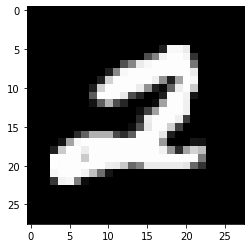

expected prediction: 1
actual prediction: 1
is_correct: True


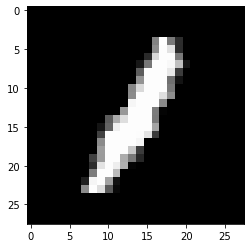

expected prediction: 1
actual prediction: 1
is_correct: True


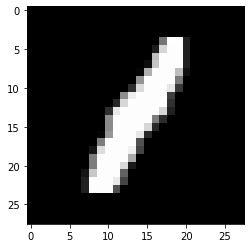

expected prediction: 1
actual prediction: 1
is_correct: True


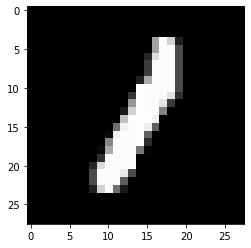

expected prediction: 1
actual prediction: 1
is_correct: True


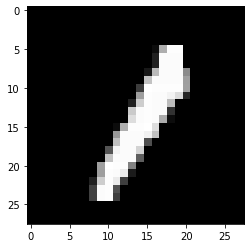

expected prediction: 7
actual prediction: 7
is_correct: True


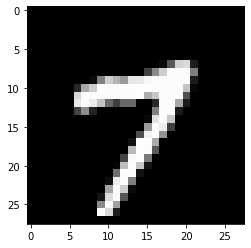

expected prediction: 2
actual prediction: 2
is_correct: True


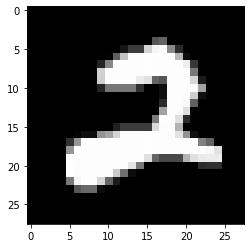

expected prediction: 4
actual prediction: 4
is_correct: True


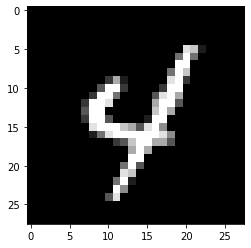

expected prediction: 7
actual prediction: 7
is_correct: True


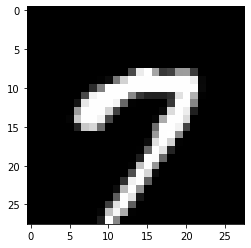

expected prediction: 5
actual prediction: 5
is_correct: True


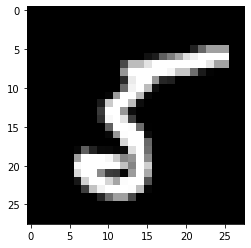

expected prediction: 2
actual prediction: 2
is_correct: True


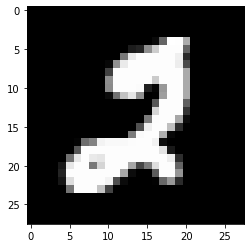

In [183]:
for test_index in range(0, 100):

    test_tensor = tf.expand_dims(x_testing_dataset[test_index], axis=0)

    test_predictions = model_001.predict(test_tensor)

    test_max_prediction_index = tf.argmax(test_predictions, axis=1)
    
    expected_value = y_testing_dataset[test_index]
    actual_value = test_max_prediction_index[0].numpy()
    is_correct = expected_value == actual_value
    
    if is_correct == True:
        print('expected prediction:', expected_value)
        print('actual prediction:', actual_value)

        print('is_correct:', expected_value == actual_value)

        plt.imshow(x_testing_dataset[test_index], cmap='gray')
        plt.show()

## Observing items that the model got wrong

- Some of the confusions are understandable
- Many confusions appear to be angled numbers
- Some of them are wrong, but super confident that they are correct. This implies that the correct value didn't "light up" at all.
- Some of the confusions have lower confidence scores, which is nice. If a human was involved, clarification could have been requested.

expected prediction: 8
actual prediction: 7
confidence: 94 %
is_correct: False


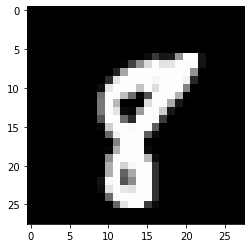

expected prediction: 1
actual prediction: 8
confidence: 100 %
is_correct: False


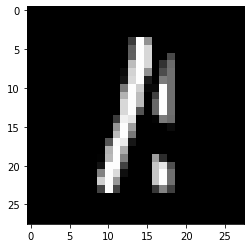

expected prediction: 2
actual prediction: 3
confidence: 100 %
is_correct: False


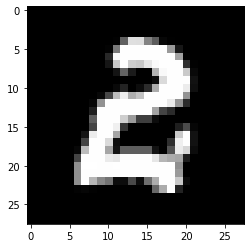

expected prediction: 4
actual prediction: 7
confidence: 34 %
is_correct: False


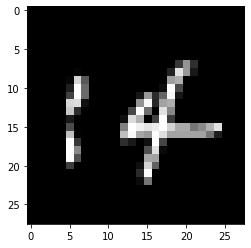

expected prediction: 7
actual prediction: 8
confidence: 100 %
is_correct: False


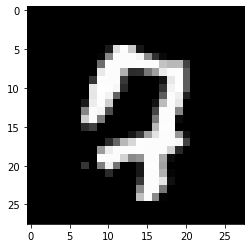

expected prediction: 4
actual prediction: 9
confidence: 100 %
is_correct: False


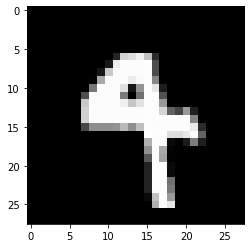

expected prediction: 5
actual prediction: 3
confidence: 100 %
is_correct: False


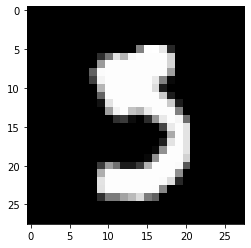

expected prediction: 3
actual prediction: 8
confidence: 99 %
is_correct: False


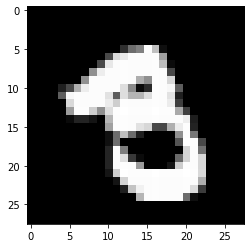

expected prediction: 5
actual prediction: 3
confidence: 82 %
is_correct: False


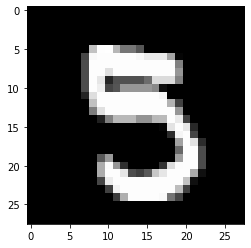

expected prediction: 3
actual prediction: 8
confidence: 100 %
is_correct: False


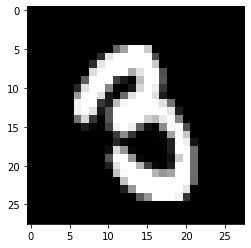

expected prediction: 3
actual prediction: 8
confidence: 56 %
is_correct: False


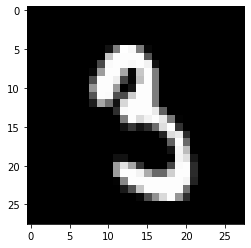

expected prediction: 5
actual prediction: 3
confidence: 95 %
is_correct: False


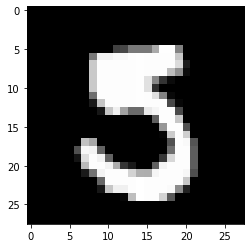

expected prediction: 2
actual prediction: 0
confidence: 52 %
is_correct: False


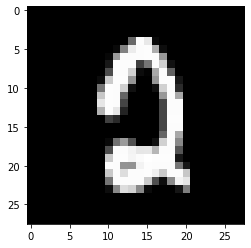

expected prediction: 3
actual prediction: 9
confidence: 88 %
is_correct: False


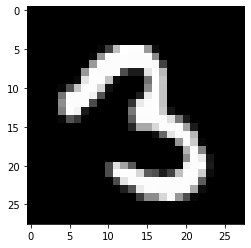

expected prediction: 9
actual prediction: 0
confidence: 84 %
is_correct: False


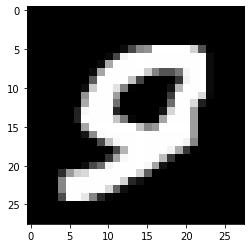

expected prediction: 2
actual prediction: 0
confidence: 58 %
is_correct: False


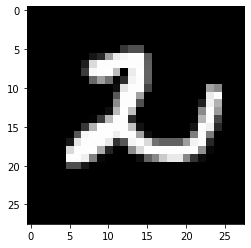

expected prediction: 8
actual prediction: 9
confidence: 96 %
is_correct: False


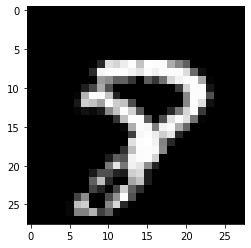

expected prediction: 8
actual prediction: 3
confidence: 79 %
is_correct: False


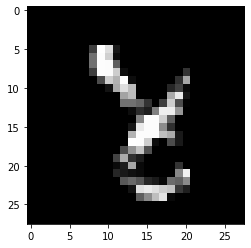

expected prediction: 9
actual prediction: 5
confidence: 97 %
is_correct: False


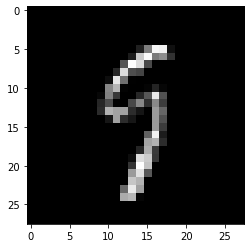

expected prediction: 0
actual prediction: 5
confidence: 100 %
is_correct: False


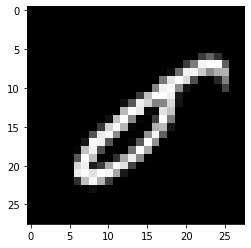

expected prediction: 8
actual prediction: 9
confidence: 98 %
is_correct: False


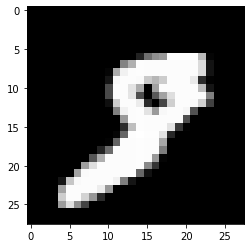

expected prediction: 9
actual prediction: 4
confidence: 100 %
is_correct: False


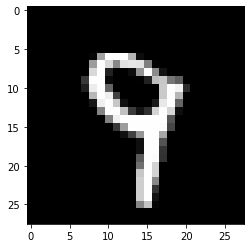

expected prediction: 6
actual prediction: 4
confidence: 99 %
is_correct: False


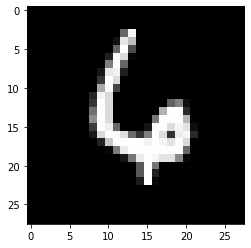

expected prediction: 0
actual prediction: 3
confidence: 100 %
is_correct: False


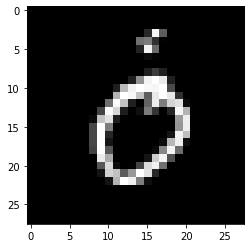

expected prediction: 4
actual prediction: 8
confidence: 98 %
is_correct: False


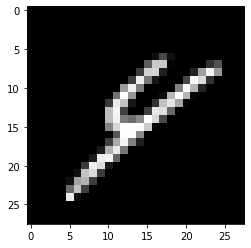

expected prediction: 9
actual prediction: 8
confidence: 96 %
is_correct: False


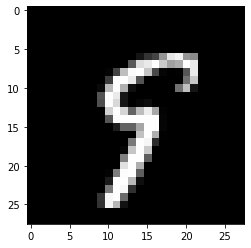

expected prediction: 8
actual prediction: 3
confidence: 100 %
is_correct: False


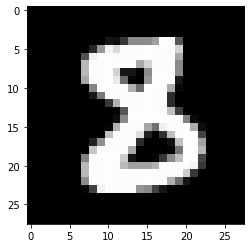

expected prediction: 8
actual prediction: 3
confidence: 63 %
is_correct: False


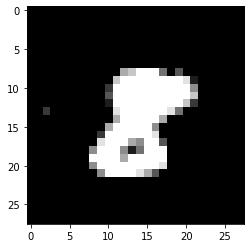

expected prediction: 9
actual prediction: 4
confidence: 70 %
is_correct: False


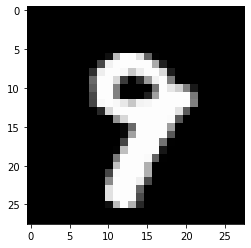

expected prediction: 2
actual prediction: 1
confidence: 88 %
is_correct: False


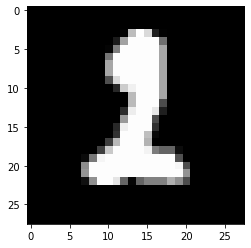

expected prediction: 2
actual prediction: 8
confidence: 96 %
is_correct: False


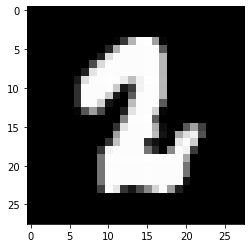

expected prediction: 2
actual prediction: 8
confidence: 90 %
is_correct: False


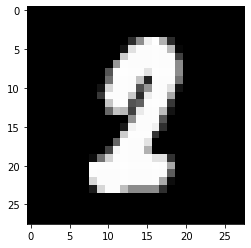

expected prediction: 7
actual prediction: 1
confidence: 84 %
is_correct: False


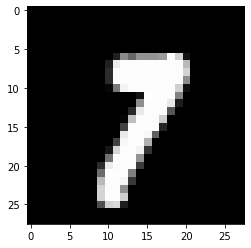

expected prediction: 6
actual prediction: 4
confidence: 100 %
is_correct: False


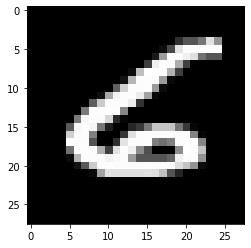

expected prediction: 6
actual prediction: 4
confidence: 100 %
is_correct: False


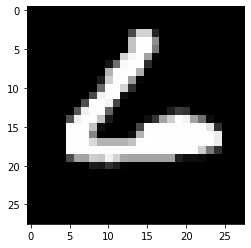

expected prediction: 9
actual prediction: 5
confidence: 96 %
is_correct: False


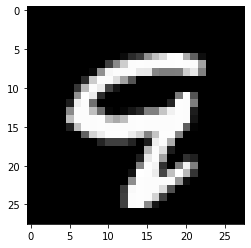

expected prediction: 8
actual prediction: 5
confidence: 84 %
is_correct: False


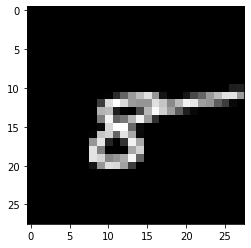

expected prediction: 8
actual prediction: 5
confidence: 100 %
is_correct: False


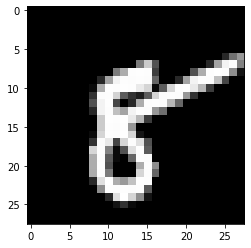

expected prediction: 2
actual prediction: 1
confidence: 85 %
is_correct: False


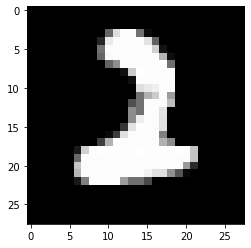

expected prediction: 5
actual prediction: 3
confidence: 83 %
is_correct: False


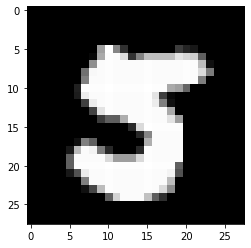

expected prediction: 7
actual prediction: 3
confidence: 62 %
is_correct: False


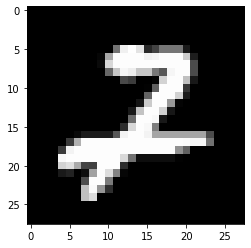

expected prediction: 7
actual prediction: 2
confidence: 98 %
is_correct: False


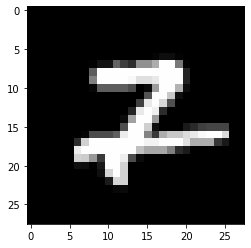

expected prediction: 7
actual prediction: 2
confidence: 100 %
is_correct: False


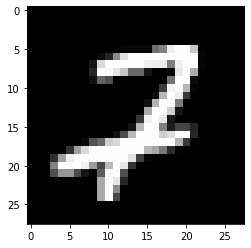

expected prediction: 8
actual prediction: 4
confidence: 92 %
is_correct: False


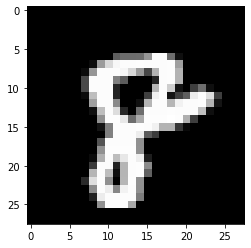

expected prediction: 9
actual prediction: 4
confidence: 79 %
is_correct: False


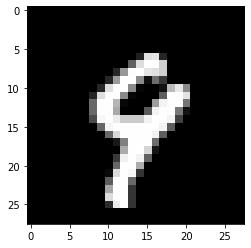

expected prediction: 9
actual prediction: 8
confidence: 87 %
is_correct: False


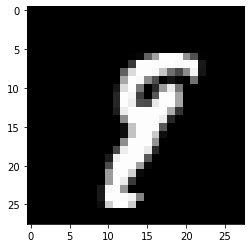

expected prediction: 9
actual prediction: 4
confidence: 100 %
is_correct: False


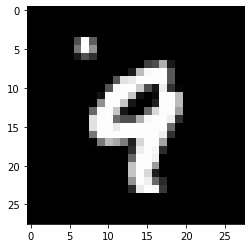

expected prediction: 0
actual prediction: 1
confidence: 100 %
is_correct: False


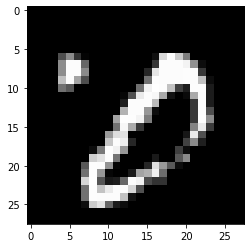

expected prediction: 2
actual prediction: 7
confidence: 99 %
is_correct: False


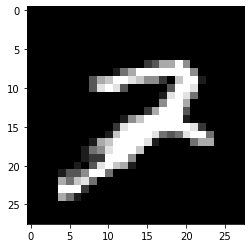

expected prediction: 6
actual prediction: 3
confidence: 100 %
is_correct: False


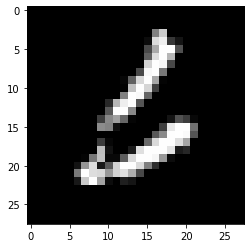

expected prediction: 9
actual prediction: 4
confidence: 97 %
is_correct: False


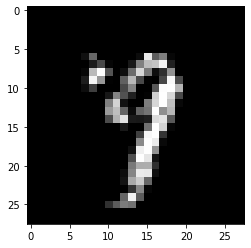

expected prediction: 6
actual prediction: 5
confidence: 65 %
is_correct: False


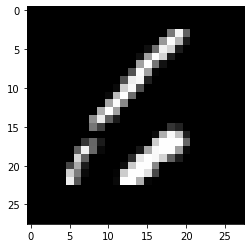

expected prediction: 5
actual prediction: 6
confidence: 100 %
is_correct: False


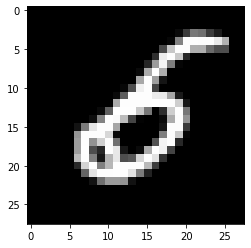

expected prediction: 4
actual prediction: 2
confidence: 86 %
is_correct: False


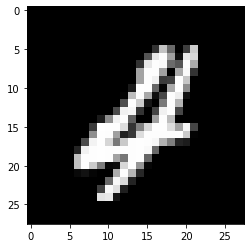

expected prediction: 2
actual prediction: 0
confidence: 99 %
is_correct: False


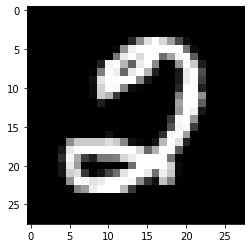

expected prediction: 8
actual prediction: 5
confidence: 89 %
is_correct: False


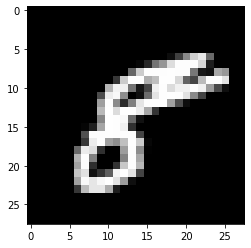

expected prediction: 2
actual prediction: 0
confidence: 100 %
is_correct: False


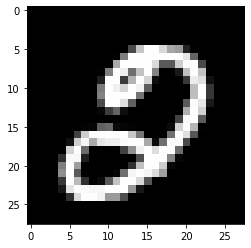

expected prediction: 5
actual prediction: 0
confidence: 100 %
is_correct: False


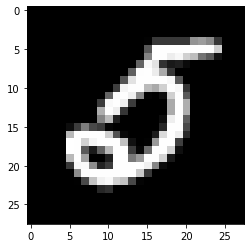

expected prediction: 2
actual prediction: 0
confidence: 100 %
is_correct: False


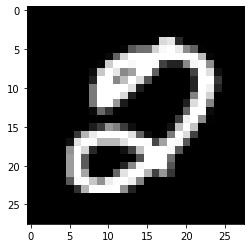

expected prediction: 4
actual prediction: 1
confidence: 74 %
is_correct: False


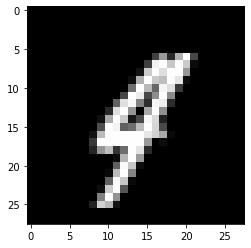

expected prediction: 9
actual prediction: 4
confidence: 100 %
is_correct: False


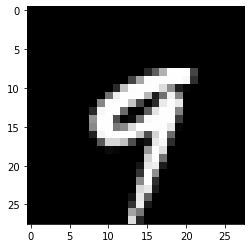

expected prediction: 2
actual prediction: 3
confidence: 88 %
is_correct: False


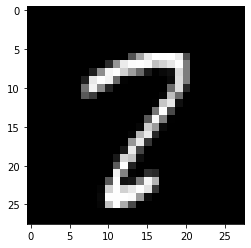

expected prediction: 6
actual prediction: 8
confidence: 50 %
is_correct: False


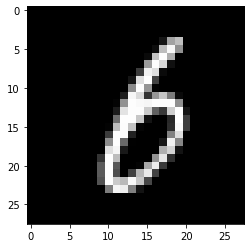

expected prediction: 3
actual prediction: 5
confidence: 89 %
is_correct: False


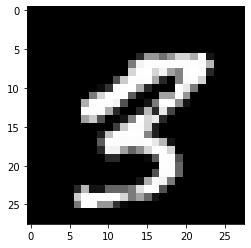

In [198]:
for test_index in range(0, 5000):

    test_tensor = tf.expand_dims(x_testing_dataset[test_index], axis=0)

    test_predictions = model_001.predict(test_tensor)

    test_max_prediction_index = tf.argmax(test_predictions, axis=1)
    
    expected_value = y_testing_dataset[test_index]
    actual_value = test_max_prediction_index[0].numpy()
    is_correct = expected_value == actual_value
    
    if is_correct == False:
        print('expected prediction:', expected_value)
        print('actual prediction:', actual_value)
        print('confidence:', round(test_predictions[0][test_max_prediction_index[0]] * 100), "%")

        print('is_correct:', expected_value == actual_value)

        plt.imshow(x_testing_dataset[test_index], cmap='gray')
        plt.show()